# Introduction 

For the purpose of this project, I will be investigating wind behaviour across four major Irish airports. My project goal is to understand how:

- wind speeds 

- gust intensity 

- wind direction 

- storm clustering 
 
Vary across airport locations in Ireland as well as how they vary over time, I aim to identify the airports and periods most affected by severe wind events.

Airports that I will be look at in this project are:

- Dublin

- Shannon

- Cork 

- Knock 

I aquired historical datasets for these four airports at [Met Eireann's]( https://www.met.ie/climate/available-data/historical-data) website. I filtered the four airports from this website.

## Aquiring the datasets.

Import Libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from windrose import WindroseAxes
from matplotlib.patches import Patch
from datetime import datetime
import calendar
import matplotlib.image as mpimg

First I will read in the CSV Files for the four airports and name the dataframes accordingly. See [coderivers.org](https://coderivers.org/blog/import-csv-in-python/) for best practcies to consider when reading in CSV files. Then I will skip Meta data using skiprows and format. Next, I will parse the first column as date and set it as the index. Ensure to format the date as well for readability.

In [3]:
# Load the Shannon airport dataset.

shannon = pd.read_csv("data/dly518.csv", parse_dates=["date"], index_col='date', skiprows=24,low_memory=False, date_format='%d-%b-%y')


In [4]:
# load the Dublin airport dataset.

dublin = pd.read_csv("data/dly532.csv", parse_dates=["date"], index_col='date', skiprows=25, low_memory=False, date_format='%d-%b-%y')

In [5]:
# Load the Cork airport dataset.

cork = pd.read_csv("data/dly3904.csv", parse_dates=["date"], index_col='date', skiprows=24,low_memory=False, date_format='%d-%b-%y')

In [6]:
# Load the Knock airport dataset.

knock = pd.read_csv("data/dly4935.csv", parse_dates=["date"], index_col='date', skiprows=24, low_memory=False, date_format='%d-%b-%y')

I will check the datasets have loaded correctly by checking the first few rows. 

In [7]:
shannon.head()

ind  maxtp  ind.1  mintp igmin  gmin  ind.2  rain     cbl  wdsp  \
date                                                                          
01-Sept-45    0   19.2      0   14.4     0  13.6      0   0.2  1013.8  12.0   
02-Sept-45    0   20.7      0   14.8     0  13.4      3   0.0  1018.2   7.3   
03-Sept-45    0   23.3      0   11.8     0   9.6      3   0.0  1021.2   4.2   
04-Sept-45    0   21.6      0    9.4     0   6.7      3   0.0  1024.2   6.2   
05-Sept-45    0   21.3      0   12.2     0  11.3      3   0.0  1024.9   4.9   

            ...  ind.5  hg   sun  dos  soil   pe  evap smd_wd smd_md smd_pd  
date        ...                                                              
01-Sept-45  ...      0  27   1.6    0        1.6   2.3                       
02-Sept-45  ...      0  16   9.3    0        2.5   3.5                       
03-Sept-45  ...      0  12  11.4    0        2.9   3.9                       
04-Sept-45  ...      0  18   5.3    0          2   2.7                       
05-Sept-45  ...      0  13   3.6    0        1.8   2.4                       

[5 rows x 24 columns]

In [8]:
dublin.head()

ind  maxtp  ind.1  mintp  igmin gmin  ind.2  rain     cbl  wdsp  \
date                                                                         
01-Jan-42    0    9.7      0    6.8      0  4.7      2   0.0  1020.3  17.2   
02-Jan-42    0    9.9      0    7.9      0  6.7      0   0.1  1016.2  15.2   
03-Jan-42    0   11.2      0    8.9      0  7.2      0   1.5  1006.8  14.0   
04-Jan-42    0    9.2      0    2.7      0  3.4      0   3.5  1001.5  17.0   
05-Jan-42    0    3.5      1   -0.8      0    0      0   0.6  1013.4  13.0   

           ...  hg  sun  dos g_rad  soil   pe  evap smd_wd smd_md smd_pd  
date       ...                                                            
01-Jan-42  ...      0.0    0              1.1   1.4                       
02-Jan-42  ...      0.0    0              0.7   0.9                       
03-Jan-42  ...      0.1    0              0.5   0.6                       
04-Jan-42  ...      0.6    0              0.6   0.7                       
05-Jan-42  ...      3.4    0              0.6   0.7                       

[5 rows x 25 columns]

In [9]:
cork.head()

ind  maxtp  ind.1  mintp igmin gmin  ind.2 rain     cbl  wdsp  ...  \
date                                                                      ...   
01-Jan-62    0    2.8      1   -2.5                 8        999.6   9.2  ...   
02-Jan-62    0    2.8      1   -3.7                 8       1005.8   5.9  ...   
03-Jan-62    0    2.3      1   -3.8                 8       1007.8   6.7  ...   
04-Jan-62    0    6.6      0    0.6                 8       1007.8   4.5  ...   
05-Jan-62    0    9.3      0    0.6                 8       1002.2  12.7  ...   

           ind.5  hg  sun  dos  soil  pe evap  smd_wd smd_md smd_pd  
date                                                                 
01-Jan-62      0  24         0                                       
02-Jan-62      0  10         0                                       
03-Jan-62      0  13         0                                       
04-Jan-62      0  12         0                                       
05-Jan-62      0  29         0                                       

[5 rows x 24 columns]

In [10]:
knock.head()

ind maxtp  ind.1 mintp igmin  gmin  ind.2  rain     cbl  wdsp  ...  \
date                                                                      ...   
01-Aug-96    4            4                        8                      ...   
02-Aug-96    0  15.1      0   9.2                  0   0.3   999.2   7.7  ...   
03-Aug-96    0    18      0  11.6     0  11.4      0     0  1002.1   6.6  ...   
04-Aug-96    0  20.4      0   9.6     0   8.6      0   0.1   991.7  11.3  ...   
05-Aug-96    0  13.7      0   8.7     0  10.9      0  13.3   983.8   7.8  ...   

           ind.5  hg  sun dos    soil   pe evap smd_wd smd_md smd_pd  
date                                                                  
01-Aug-96      1      1.1   0                                         
02-Aug-96      0  18        0                                         
03-Aug-96      0  18  5.7   0    15.6  2.7  3.7    2.7    2.7    2.7  
04-Aug-96      0  32  6.8   0  15.975  3.7    5    6.2    6.2    6.3  
05-Aug-96      0  24    0   0  14.625  1.1  1.8      0   -6.1   -5.9  

[5 rows x 24 columns]

## Cleaning the datasets.

Next I will Ccombine the four airport datasets into one Dataframe. Doing thils will allow me to view the data all together or I can filter later per airport. Useful to create comparrison plots. I need to create a Column for the airport names to be stored. This can be acheived using pandas.concat. It will take the multiple dataframes and stick them together.

In [11]:
# Store the four airport DataFrames into a single DF. Adsd an Airport column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

all_airports = pd.concat([
    shannon.assign(Airport='Shannon'),
    dublin.assign(Airport='Dublin'),
    cork.assign(Airport='Cork'),
    knock.assign(Airport='Knock')
], axis=0)

# Move Airport column to front for readability.
# See: https://stackoverflow.com/questions/21415661/pandas-move-column-to-first-position-in-dataframe

all_airports = all_airports[['Airport'] + [c for c in all_airports.columns if c != 'Airport']]

# Check
all_airports.head()


Airport  ind maxtp  ind.1 mintp igmin  gmin  ind.2 rain     cbl  \
date                                                                          
01-Sept-45  Shannon    0  19.2      0  14.4     0  13.6      0  0.2  1013.8   
02-Sept-45  Shannon    0  20.7      0  14.8     0  13.4      3  0.0  1018.2   
03-Sept-45  Shannon    0  23.3      0  11.8     0   9.6      3  0.0  1021.2   
04-Sept-45  Shannon    0  21.6      0   9.4     0   6.7      3  0.0  1024.2   
05-Sept-45  Shannon    0  21.3      0  12.2     0  11.3      3  0.0  1024.9   

            ...  hg   sun dos  soil   pe  evap smd_wd smd_md smd_pd g_rad  
date        ...                                                            
01-Sept-45  ...  27   1.6   0        1.6   2.3                        NaN  
02-Sept-45  ...  16   9.3   0        2.5   3.5                        NaN  
03-Sept-45  ...  12  11.4   0        2.9   3.9                        NaN  
04-Sept-45  ...  18   5.3   0          2   2.7                        NaN  
05-Sept-45  ...  13   3.6   0        1.8   2.4                        NaN  

[5 rows x 26 columns]

I need to move the date column to ensure it matches the rest of the columns.

In [12]:
# move date index to a column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

all_airports = all_airports.reset_index()

# Check.
all_airports.head()

date  Airport  ind maxtp  ind.1 mintp igmin  gmin  ind.2 rain  ...  \
0  01-Sept-45  Shannon    0  19.2      0  14.4     0  13.6      0  0.2  ...   
1  02-Sept-45  Shannon    0  20.7      0  14.8     0  13.4      3  0.0  ...   
2  03-Sept-45  Shannon    0  23.3      0  11.8     0   9.6      3  0.0  ...   
3  04-Sept-45  Shannon    0  21.6      0   9.4     0   6.7      3  0.0  ...   
4  05-Sept-45  Shannon    0  21.3      0  12.2     0  11.3      3  0.0  ...   

   hg   sun  dos soil   pe evap  smd_wd smd_md smd_pd g_rad  
0  27   1.6    0       1.6  2.3                         NaN  
1  16   9.3    0       2.5  3.5                         NaN  
2  12  11.4    0       2.9  3.9                         NaN  
3  18   5.3    0         2  2.7                         NaN  
4  13   3.6    0       1.8  2.4                         NaN  

[5 rows x 27 columns]

There is missing values in some of the columns.  I will replace these with NaN objects.

In [13]:
# Replace blank spaces with NaN values.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

all_airports.replace(to_replace=' ', value=np.nan, inplace=True)

# Check.
all_airports.head()

date  Airport  ind maxtp  ind.1 mintp igmin  gmin  ind.2 rain  ...  \
0  01-Sept-45  Shannon    0  19.2      0  14.4     0  13.6      0  0.2  ...   
1  02-Sept-45  Shannon    0  20.7      0  14.8     0  13.4      3  0.0  ...   
2  03-Sept-45  Shannon    0  23.3      0  11.8     0   9.6      3  0.0  ...   
3  04-Sept-45  Shannon    0  21.6      0   9.4     0   6.7      3  0.0  ...   
4  05-Sept-45  Shannon    0  21.3      0  12.2     0  11.3      3  0.0  ...   

   hg   sun  dos soil   pe evap  smd_wd smd_md smd_pd g_rad  
0  27   1.6    0  NaN  1.6  2.3     NaN    NaN    NaN   NaN  
1  16   9.3    0  NaN  2.5  3.5     NaN    NaN    NaN   NaN  
2  12  11.4    0  NaN  2.9  3.9     NaN    NaN    NaN   NaN  
3  18   5.3    0  NaN    2  2.7     NaN    NaN    NaN   NaN  
4  13   3.6    0  NaN  1.8  2.4     NaN    NaN    NaN   NaN  

[5 rows x 27 columns]

Now drop any rows that are missing values in the rows.

In [14]:
# Drop rows missing values in 'wdsp' column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

mean_wind_speed = all_airports[['wdsp']].copy()
mean_wind_speed.isna().sum()
mean_wind_speed.dropna(inplace=True)

# Check.
mean_wind_speed.head()


wdsp
0  12.0
1   7.3
2   4.2
3   6.2
4   4.9

In [15]:
# Drop rows missing values in 'hm' column.

max_wind_speed = all_airports[['hm']].copy()
max_wind_speed.isna().sum()
max_wind_speed.dropna(inplace=True)

# Check.
max_wind_speed.head()


hm
0  20
1  12
2   8
3  13
4   9

In [16]:
# Drop rows missing values in 'ddhm' column.

mean_wind_direction = all_airports[['ddhm']].copy()
mean_wind_direction.isna().sum()
mean_wind_direction.dropna(inplace=True)

# Check.
mean_wind_direction.head()


ddhm
0   90
1  100
2  100
3  310
4  100

In [17]:
# Drop rows missing values in 'hg' column.

max_gust_speed = all_airports[['hg']].copy()
max_gust_speed.isna().sum()
max_gust_speed.dropna(inplace=True)

# Check.
max_gust_speed.head()

hg
0  27
1  16
2  12
3  18
4  13

For the purpose of this investigation, I will be looking at the following columns for analysis.

__Airport - Location of Airport__

__Date - Date data recorded.__

__'wdsp:'   -  Mean Wind Speed (knot)__

__'hm:'    -  Highest ten minute mean wind speed (knot)__

__'ddhm:'   -  Wind Direction at max 10 min. mean (deg)__

__'hg: '   -  Highest Gust (knot)__

In [18]:
# Drop unwanted columns and rename the ones being kept.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

all_airports = all_airports[['date', 'Airport','wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
  'date': 'Date',
  'wdsp': 'Mean_Wind_Speed(knots)', 
  'hm': 'Max_Wind_Speed(knots)', 
  'ddhm': 'Mean_Wind_Direction(degrees)', 
  'hg': 'Max_Gust_Speed(knots)'})   

# Check.
all_airports.head()

Date  Airport Mean_Wind_Speed(knots) Max_Wind_Speed(knots)  \
0  01-Sept-45  Shannon                   12.0                    20   
1  02-Sept-45  Shannon                    7.3                    12   
2  03-Sept-45  Shannon                    4.2                     8   
3  04-Sept-45  Shannon                    6.2                    13   
4  05-Sept-45  Shannon                    4.9                     9   

  Mean_Wind_Direction(degrees) Max_Gust_Speed(knots)  
0                           90                    27  
1                          100                    16  
2                          100                    12  
3                          310                    18  
4                          100                    13

In [19]:
# Check the dates have parsed properly.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

all_airports['Date'].dtype

all_airports['Date'] = pd.to_datetime(
    all_airports['Date'],
    format='%d-%b-%y',
    errors='coerce'
)

I will create a function to read in the months as the seasons, this will come in handy when doing seasonal analysis later on.

In [20]:
# Create a function to map month to season.
# https://stackoverflow.com/questions/44124436/python-datetime-to-season

def month_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"
    
# Add Season column to all_airports DataFrame.
all_airports['Season'] = all_airports['Date'].dt.month.apply(month_to_season)

# Check.

# month_to_season(1)
# month_to_season(4)
# month_to_season(7)
month_to_season(9)


'Autumn'

# __Investigating / Analysising Data__

## Intial investigation of Wind Speeds across all Four Airports.

I will start by taking a quick look at the Mean Wind Speed Distribution, the Max Speed Distribution and the Max Gust Speed Distrubution.

__Mean Wind Speed(Knots) Distribution by Airport__


This boxplot shows the distribution of mean wind speeds (in knots) for Shannon, Dublin, Cork, and Knock airports. It will show how typical wind conditions differ between them.

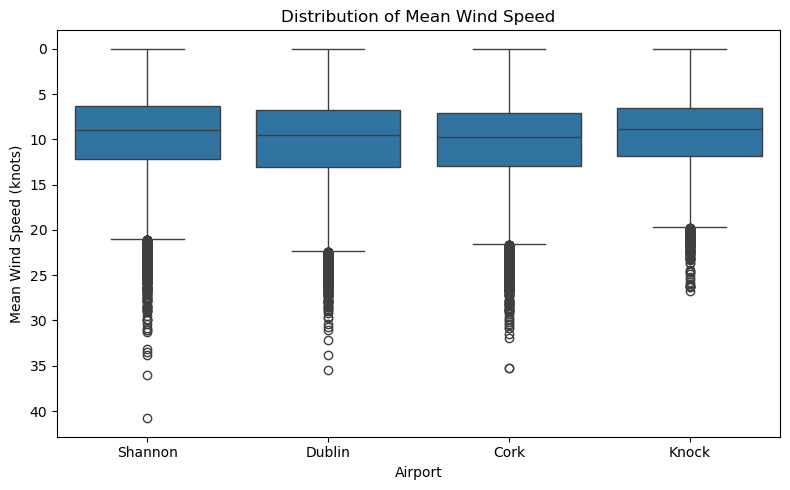

In [21]:
# Boxplot of Mean Wind Speed by Airport.
# See: https://seaborn.pydata.org/generated/seaborn.boxplot.html

plt.figure(figsize=(8, 5))

sns.boxplot(
    data=all_airports,
    x='Airport',
    y='Mean_Wind_Speed(knots)'
)

plt.title('Distribution of Mean Wind Speed')
plt.xlabel('Airport')
plt.ylabel('Mean Wind Speed (knots)')
plt.tight_layout()

# plt.savefig('mean_wind_speed_boxplot.png', dpi=300)

plt.show()


_Boxplot explained:_ The Median is the central line. The Interquartile range is the box, representing 50% of wind speeds. The whiskers are the range of typical wind speeds but it excludes the outliers. The outliers are represented as dots beyond the whiskers. They will show extreme high speeds outside the typical range.

__Median__ wind speed is similar across each of the four airports. 

__Interquartile range__  is also compareable. This suggests to me that the variability in daily mean wind speeds does not differ that much between the airports.

__Maximum__ observed mean wind speeds (top outliers) are slightly higher for Shannon and Knock, but the difference is not dramatic.

All airports show a number of outliers, representing days with unusually high mean wind speeds—these are likely 
associate.

The overall distribution is slightly right-skewed, with most days experiencing moderate winds and a smaller number of days with much higher wind speeds.

__In Summary__ there are some extreme wind days at each airport, the typical mean wind speeds are very similar for the four airports. This suggests, usually none of the four airports stand out to me as significantly windier than the others in terms of mean wind speed. However, all are subject to occasional high-wind events.

__Max Wind Speed(Knots) Distribution by Airport__

I will investiate the distribution of the max wind speeds (in knots) for Shannon, Dublin, Cork, and Knock airports using a violin plot. It will provide easy comparison of the airports. Thickness will show frequency and long tails will show more extreme wind events. 


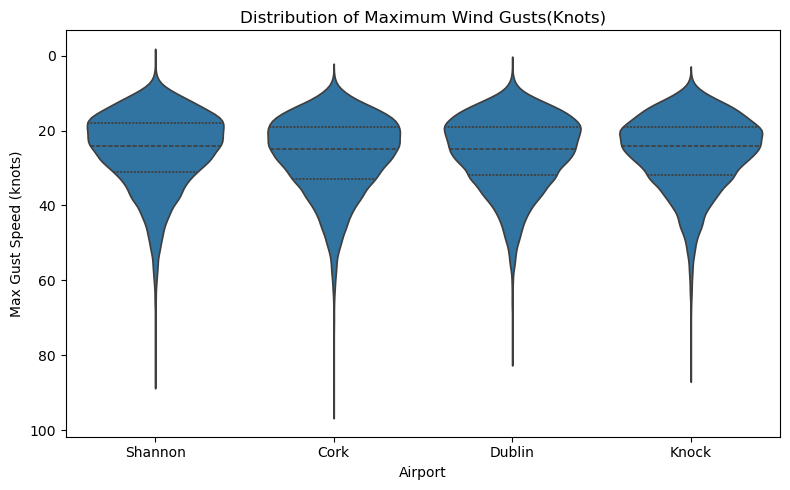

In [40]:
plt.figure(figsize=(8, 5))

sns.violinplot(
    data=all_airports,
    x='Airport',
    y='Max_Gust_Speed(knots)',
    inner='quartile'
)

plt.title('Distribution of Maximum Wind Gusts(Knots)')
plt.xlabel('Airport')
plt.ylabel('Max Gust Speed (knots)')
plt.tight_layout()

# plt.savefig('max_wind_speed_violinplot.png', dpi=300)

plt.show()


_Violin plot explained:_ The wider sections indicate more common gust speeds, while the long tails represent rare, extreme events.

__Maximum gusts__ mostly fall between 10 and 30 knots for the four airports. I can see they have similar central distributions.


__Median and quartiles__ are closely aligned for all airports, suggesting that typical gust strengths are comparable.

When I look at each of the airports, they exhibits a long upper tail, indicating that all experience occasional extreme gusts, sometimes exceeding 60 knots with Shannon and Cork showing a longer tail over Knock and DUblin.

__In Summary__ Maximum wind gusts are generally similar across Shannon, Dublin, Cork, and Knock airports, with most gusts in the 10–30 knot range and occasional extreme events. This highlights that operational risks from wind gusts are present at all airports, and none stands out as significantly more prone to extreme gusts than the others.

__Max Gust Speed(Knots) Distribution by Airport__

I will investiate the distribution of the max gust speeds (in knots) for Shannon, Dublin, Cork, and Knock airports using a histogram plot with a Kernel Density Estimate (KDE) overlay. I will use this to interpret not just the spread but the most frequent gust intensities at each of the airports.

See [scikit-learn.org](https://scikit-learn.org/stable/modules/density.html) and [en.wikipedia.org](https://en.wikipedia.org/wiki/Kernel_density_estimation) for more information on Kernal Density Estimate (KDE)

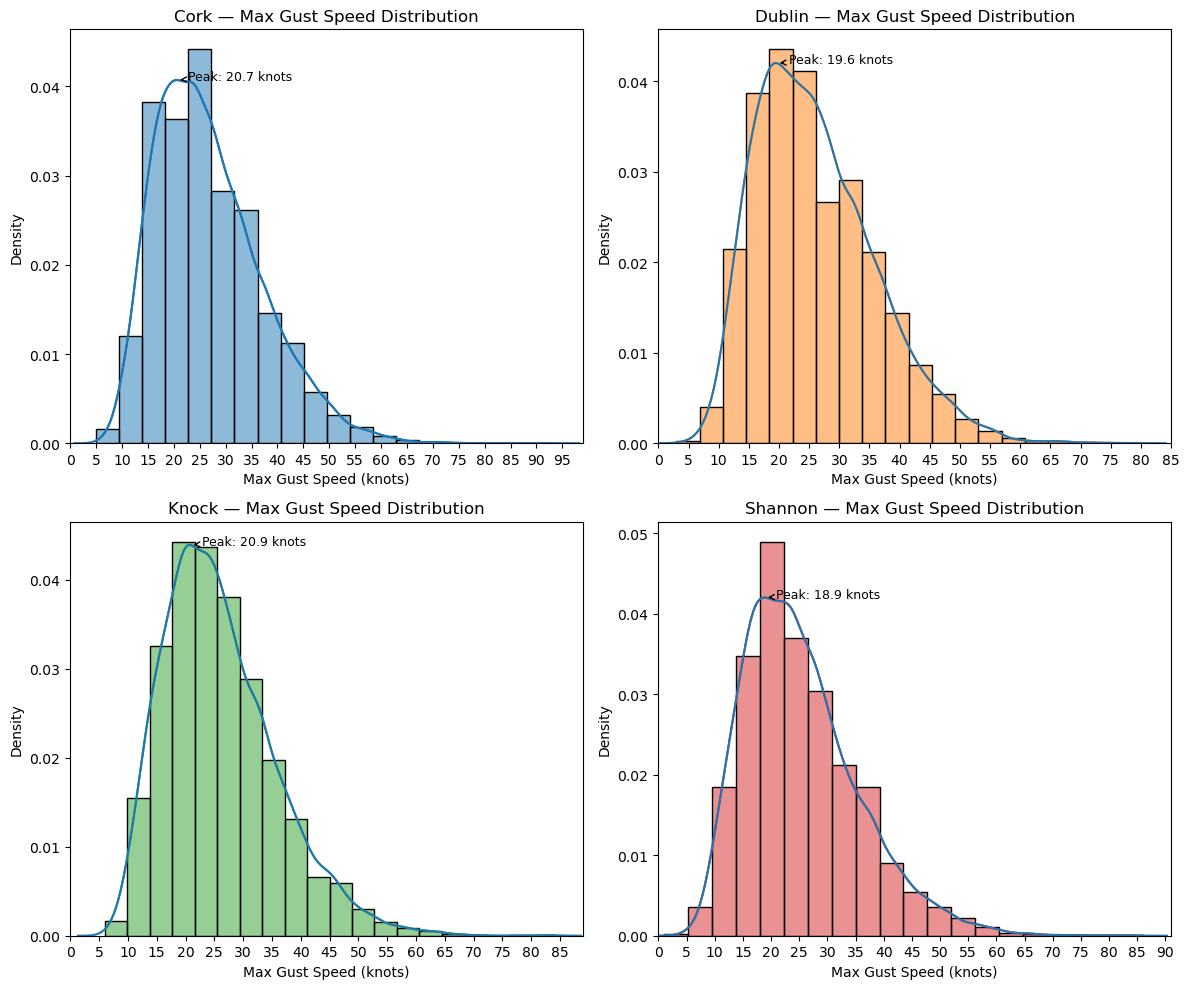

In [41]:
# Pivot the data to read in Airport Columns and wind variable. 
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html

max_gust_speeds = all_airports.pivot(columns='Airport', values='Max_Gust_Speed(knots)')

# Create 2x2 subplot grid.
# See: # See: https://stackoverflow.com/questions/46862861/what-does-axes-flat-in-matplotlib-do
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# List of airports.
airports = max_gust_speeds.columns

# Loop through each airport. 
# See: https://docs.python.org/3/library/functions.html#zip
for ax, airport in zip(axes, airports):
    data = pd.to_numeric(max_gust_speeds[airport], errors='coerce').dropna()

    # Plot histogram and the KDE.
    sns.histplot(data=data, bins=20, kde=True, stat="density",
                 color=sns.color_palette()[airports.tolist().index(airport)],
                 ax=ax)

    # Compute KDE peak using seaborn.
    # See: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

    kde = sns.kdeplot(data=data, ax=ax, bw_adjust=1).get_lines()[0]
    x_vals = kde.get_xdata()
    y_vals = kde.get_ydata()
    
    # See: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
    peak_x = x_vals[np.argmax(y_vals)]
    peak_y = max(y_vals)

    # Annotate the KDE peak.
    # See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html
    ax.annotate(f"Peak: {peak_x:.1f} knots",
                xy=(peak_x, peak_y),
                xytext=(peak_x + 2, peak_y),
                arrowprops=dict(arrowstyle="->", color='black'),
                fontsize=9)

    # Plot title and labels.
    ax.set_title(f"{airport} — Max Gust Speed Distribution")
    ax.set_xlabel("Max Gust Speed (knots)")
    ax.set_ylabel("Density")
    ax.set_xlim(0, max(data) + 5)  
    ax.set_xticks(np.arange(0, max(data) + 6, 5))  

plt.tight_layout()

# plt.savefig('Max_Gust_Speed_histogram')
plt.show()


_Histogram explained:_ Tall peak  would mean that gusts cluster tightly around that speed, where as short ssort peak  gusts are more spread out. Wider curves would result in more variability as opposed to a narrow curve which would mean there is more consistency.


__Cork Airport:__ has a peak of 20.7 knots and I observe the gusts are centred around 20 knots there is a tight distribution here. I also can see that the histogram shows a steep drop-off beyond the peak, implying fewer extreme gusts. 

__Dublin Airport:__  has a peak of 19.6 knots and ths distribution is wider, with a longer tail toward higher gusts. The peak is slightly lower than Cork’s, but the spread has more variability.

__Knock Airport:__ has a peak of 20.9 knots. I belive it is worth noting that Knock has the highest KDE peak, indicating a very frequent gust level near 21 knots. That being said the distribution is narrower than Dublin’s, but more intense than Cork’s.

__Shannon Airport:__ has a peak of 18.9 knots and its gusts are centered slightly lower, with a smooth, almost symmetrical distribution. Shannon is stable and gust-prone, but when I compare it to Knock or Dublin, it is less intense.

__In Summary,__ Knock is the most gust-intense by frequency, with a sharp peak near 21 knots. Dublin is the most gust-variable, with a broader range and potential for stronger outliers. Cork is gusty but less volatile, while Shannon is moderate and consistent.

While I was looking at the [WindRose Python Documentation](https://python-windrose.github.io/windrose/) it is clear to see the advantages this kind of graph could bring to investigating wind direction as it gives full 360 degrees view. 

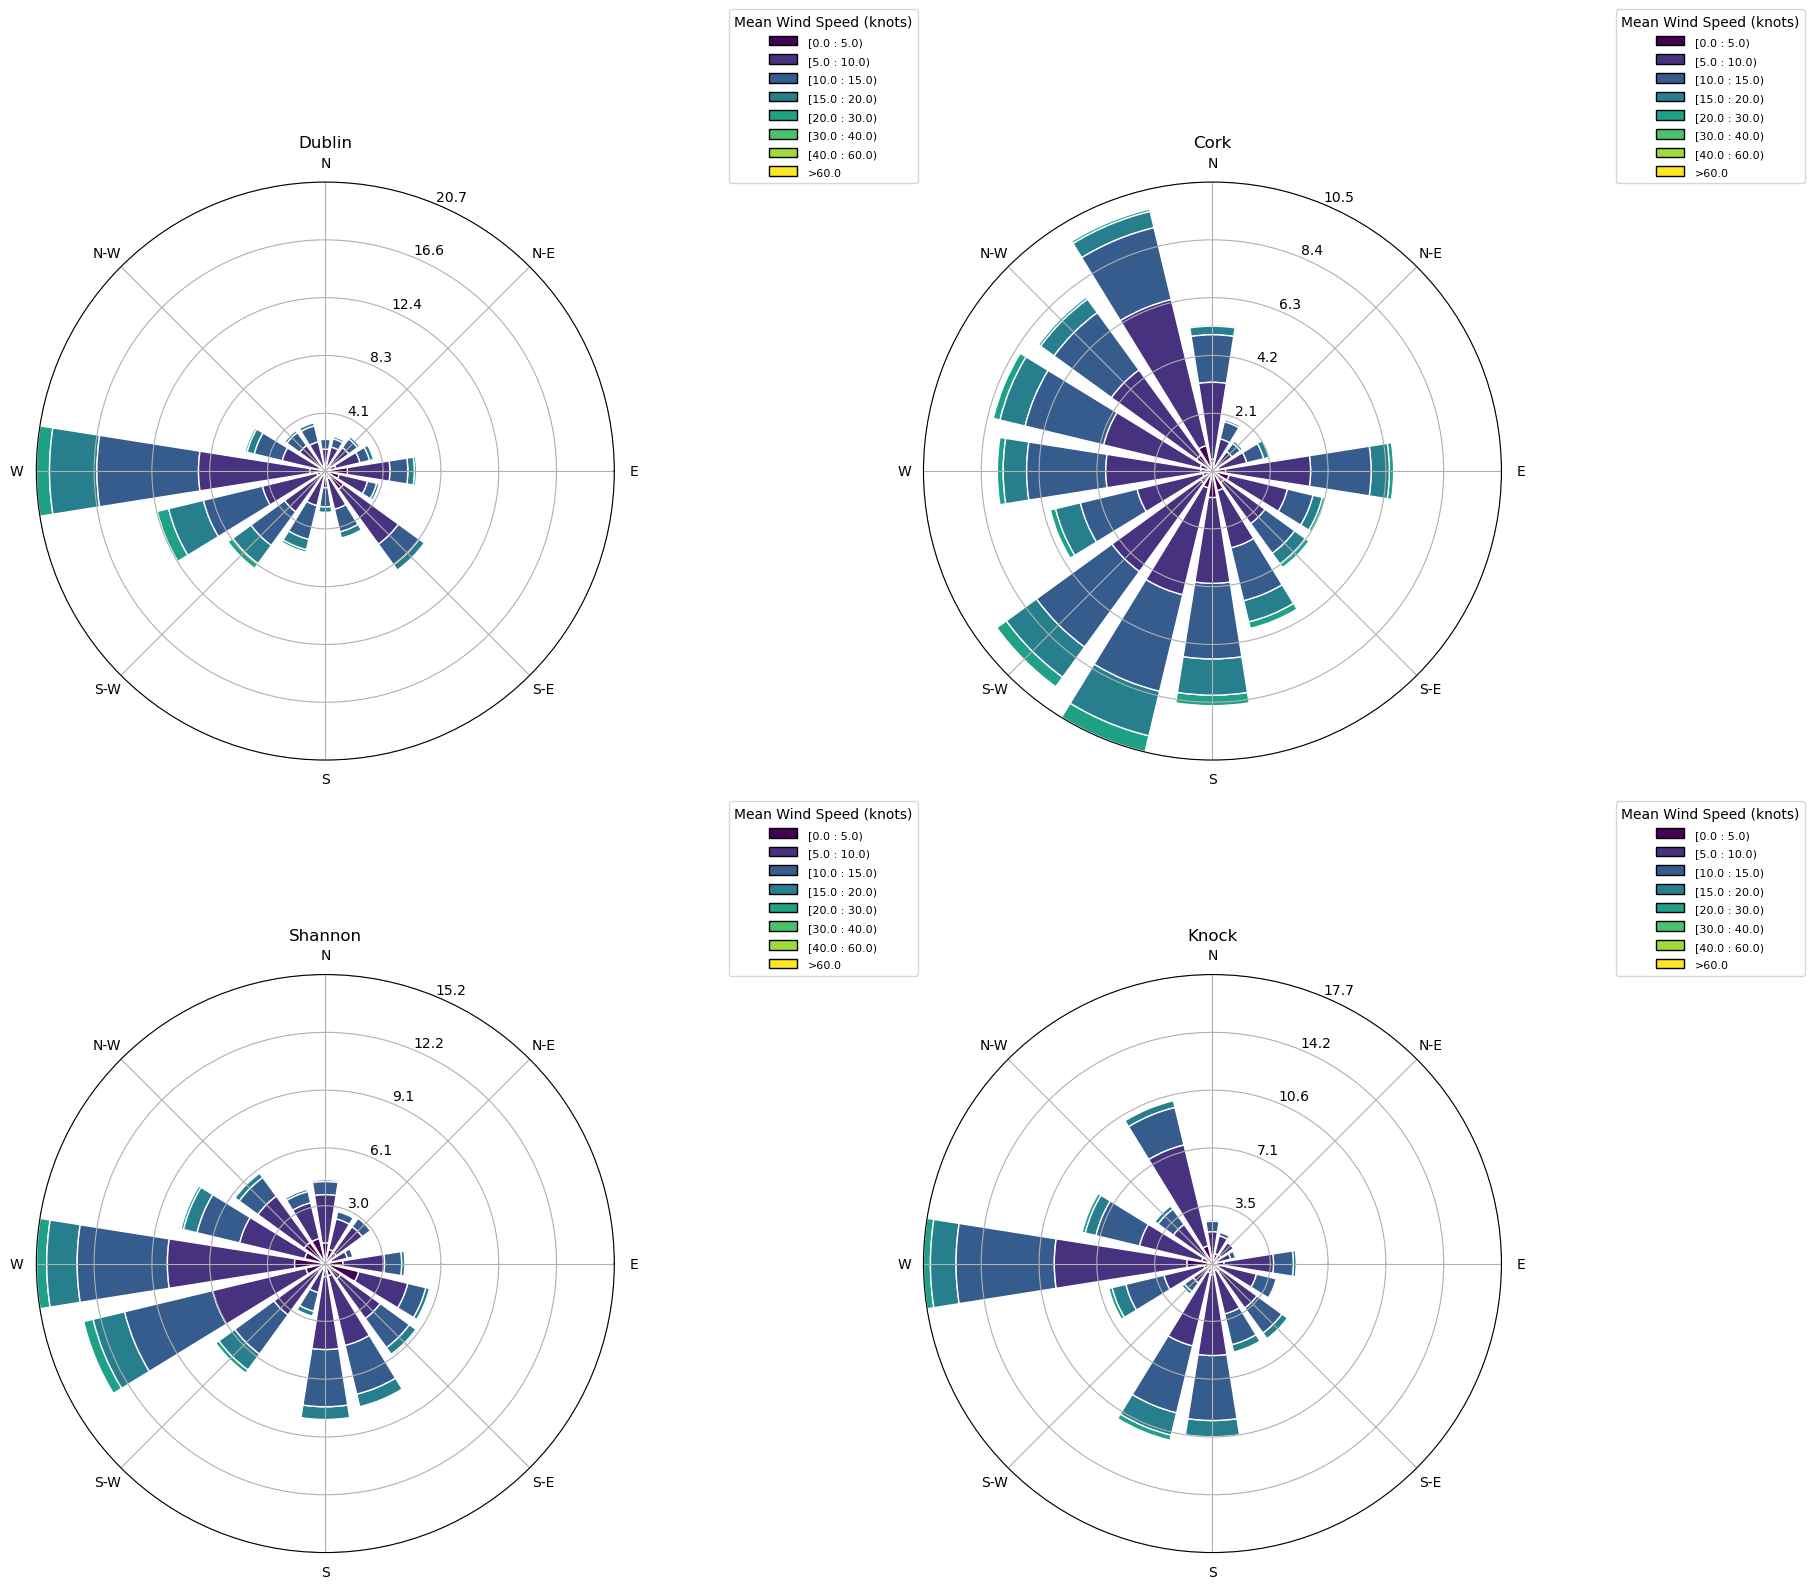

In [42]:
# Wind Rose Plots for Wind Direction and Mean Wind Speed
# See: https://python-windrose.github.io/windrose/usage-output.html#A-windrose-in-filled-representation,-with-a-controlled-colormap.

# Create wind rose plot for each of the airports.
fig = plt.figure(figsize=(18, 16))

airports = ['Dublin', 'Cork', 'Shannon', 'Knock']

# Use a for loop to create each subplot.
for i, airport in enumerate(airports, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[all_airports['Airport'] == airport].copy()

    # Ensure numeric types and drop invalid rows to avoid errors.
    # See: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Mean_Wind_Speed(knots)'], errors='coerce')

    # Create a mask to filter out NaN values. (Did this earlier in notebook but doing again here as was getting errors)
    mask = directions.notna() & speeds.notna()
    if not mask.any():
        ax.set_title(f"{airport} (no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{airport}")
    ax.set_legend(title="Mean Wind Speed (knots)")
    
    # move legend outside plot
    # See: https://matplotlib.org/stable/gallery/axes_grid1/windrose_legend_outside.html
    ax.set_legend(title="Mean Wind Speed (knots)", bbox_to_anchor=(1.2, 1))

# plt.savefig('Wind_Rose_Wind_Direction.png')

plt.tight_layout()
plt.show()


__Analysis of Mean Wind Direction(degrees) for Shannon, Dublin, Cork and Knock:__

_Cork Airport_ appears to have a strong peaks around the southwest.

_Dublin Airport_ looks to have strong influence from the west. 

_Knock Airport_ is much more evenly spread, but strong peak from the west.

_Shannon Airport_ is similar to Knock, with a strong west bias as well as Cork with a strong peaks coming in from the south west.

Overall, I observe that Southwest winds are dominant across most the airports. This would be consistent with Ireland’s prevailing wind patterns due to its position with the Atlantic Ocean.

##   Rolling Averages

I will look at rolling averages to look at the wind trends and see if I can find anyunderlying patterns. See [statisticsbyjim.com](https://statisticsbyjim.com/glossary/rolling-average/) for more information on rolling averages.

First I will look at a 7 day window, to get a view of the week to week variability. 

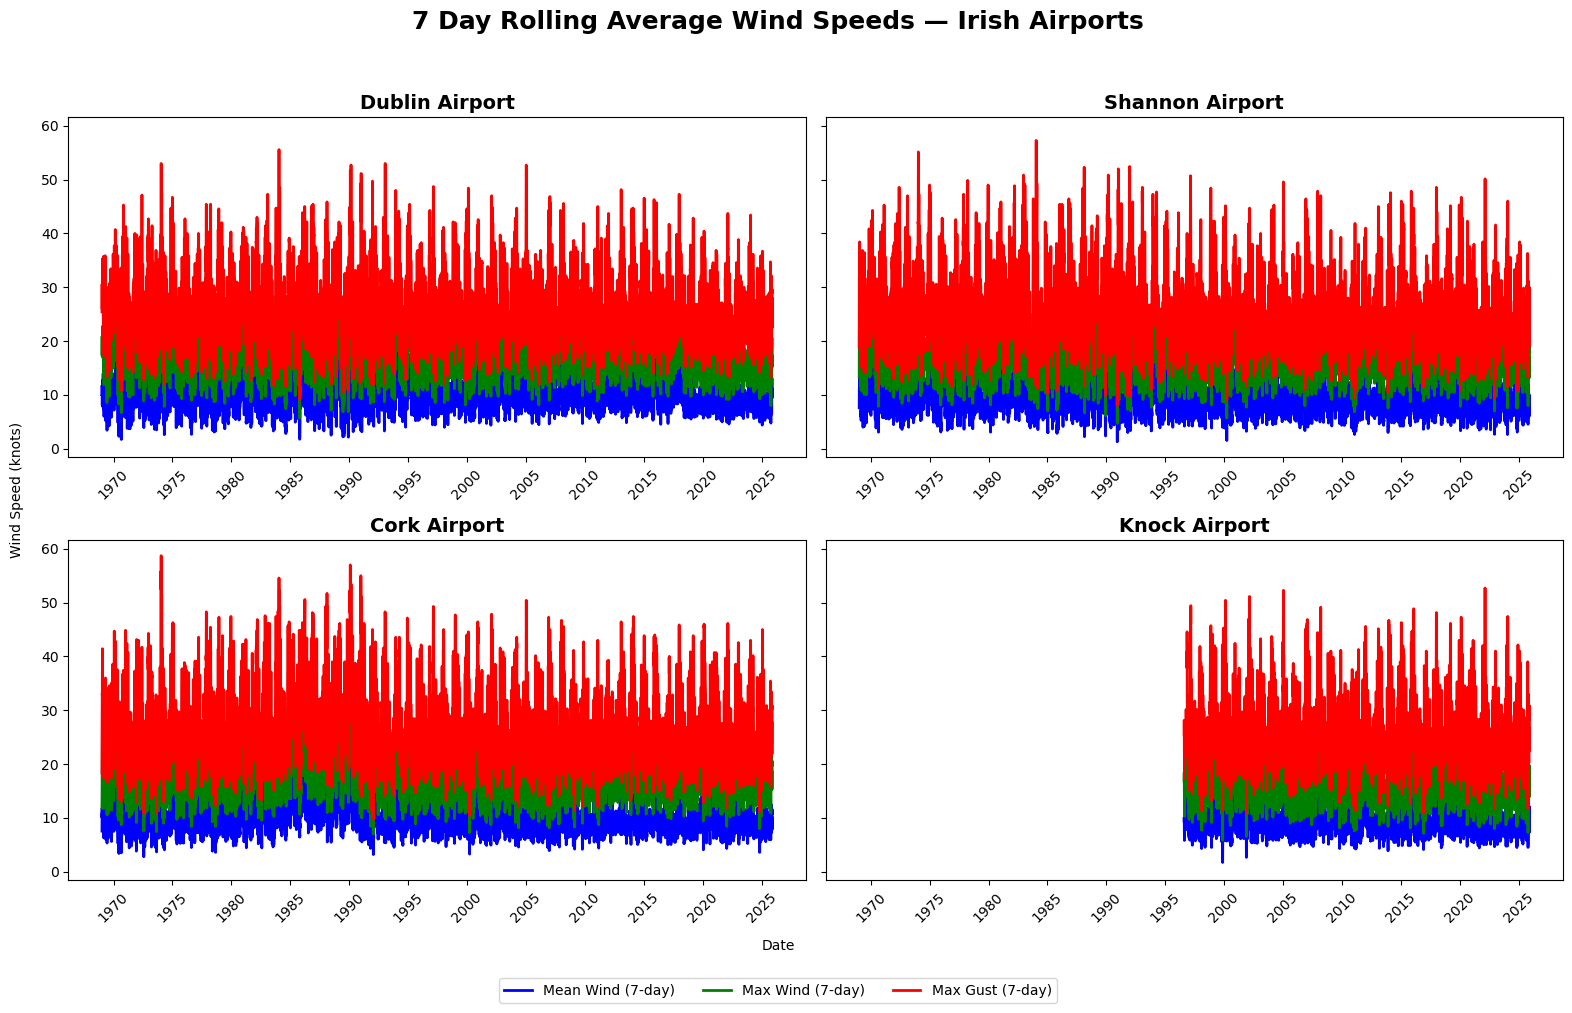

In [43]:
# Ensure datetime format for all airports DataFrame.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

all_airports['Date'] = pd.to_datetime(all_airports['Date'], errors='coerce')

# set to end at year 2025 to prevent any error reading the years in.
all_airports = all_airports[all_airports['Date'] <= '2025-12-31']
all_airports = all_airports.sort_values('Date')

# Define airports and subplot layout.
airports = ['Dublin', 'Shannon', 'Cork', 'Knock']
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Loop through each airport.
for i, airport in enumerate(airports):
    df = all_airports[all_airports['Airport'] == airport].copy()

    # Calculate rolling averages for the 7 day window.
    # See: https://www.geeksforgeeks.org/python/pandas-rolling-mean-by-time-interval/
    
    df['Mean_7']  = df['Mean_Wind_Speed(knots)'].rolling(7).mean()
    df['Max_7']   = df['Max_Wind_Speed(knots)'].rolling(7).mean()
    df['Gust_7']  = df['Max_Gust_Speed(knots)'].rolling(7).mean()

    # Plot on subplot.
    ax = axes[i]
    ax.plot(df['Date'], df['Mean_7'], label='Mean Wind (7-day)', color='blue', linewidth=2)
    ax.plot(df['Date'], df['Max_7'],  label='Max Wind (7-day)',  color='green', linewidth=2)
    ax.plot(df['Date'], df['Gust_7'], label='Max Gust (7-day)', color='red', linewidth=2)

    # Set the title. 
    ax.set_title(f"{airport} Airport", fontsize=14, weight='bold')

    # Set x-axis with years for all plots.
    # See: https://matplotlib.org/stable/api/dates_api.html

    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', labelbottom=True, rotation=45)

# Plot labels.
fig.suptitle("7 Day Rolling Average Wind Speeds — Irish Airports", fontsize=18, weight='bold')
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.02, 0.5, 'Wind Speed (knots)', va='center', rotation='vertical') 

# Legend below all the plots.
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02))

# rect used here to move y axis label out of the plot.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

plt.tight_layout(rect=[0.03, 0.05, 1, 0.95]) 

# plt.savefig('7_Day_Rolling_Average_Wind_Speeds')
plt.show()


_Note: Knock only has data ranging from 1996 so data will be empty for those years._

I will now look at a 30 day window to get a view of the month to month variablity.

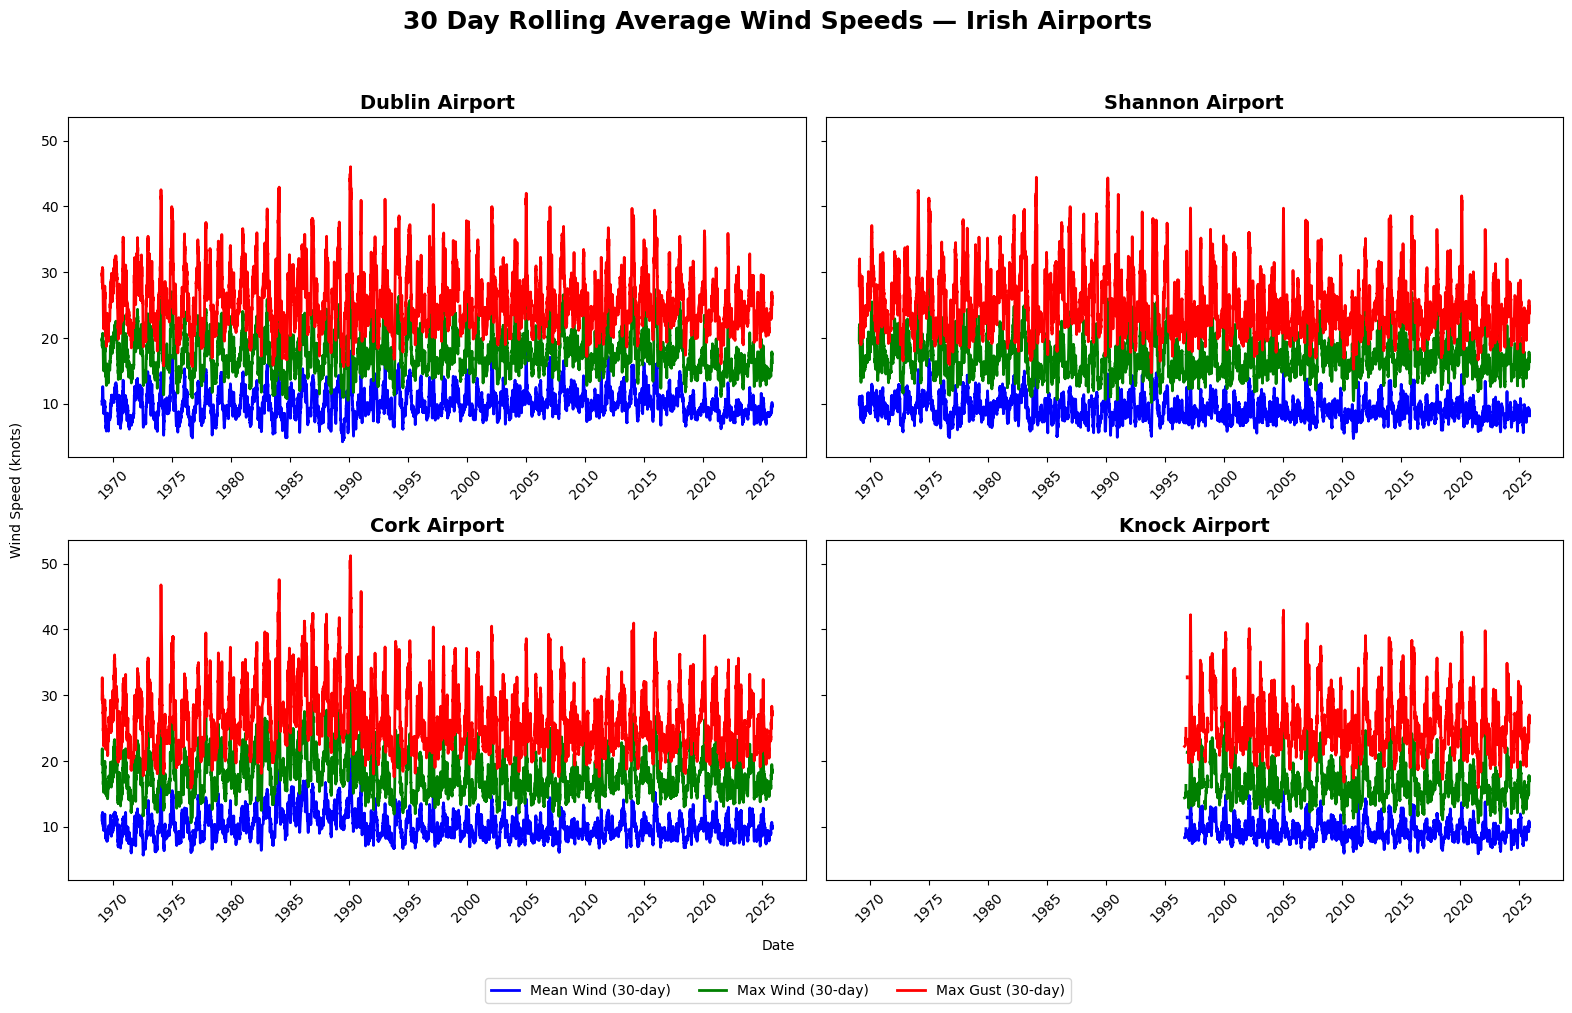

In [44]:
# Ensure datetime format for all airports DataFrame.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

all_airports['Date'] = pd.to_datetime(all_airports['Date'], errors='coerce')

# set to end at year 2025 to prevent any error reading the years in.
all_airports = all_airports[all_airports['Date'] <= '2025-12-31']
all_airports = all_airports.sort_values('Date')

# Define airports and subplot layout.
airports = ['Dublin', 'Shannon', 'Cork', 'Knock']
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Loop through each airport.
for i, airport in enumerate(airports):
    df = all_airports[all_airports['Airport'] == airport].copy()

    # Calculate rolling averages for the 30 day window.
    # See: https://www.geeksforgeeks.org/python/pandas-rolling-mean-by-time-interval/
    
    df['Mean_30'] = df['Mean_Wind_Speed(knots)'].rolling(30).mean()
    df['Max_30']  = df['Max_Wind_Speed(knots)'].rolling(30).mean()
    df['Gust_30'] = df['Max_Gust_Speed(knots)'].rolling(30).mean()

    # Plot on subplot.
    ax = axes[i]
    ax.plot(df['Date'], df['Mean_30'], label='Mean Wind (30-day)', color='blue', linewidth=2)
    ax.plot(df['Date'], df['Max_30'],  label='Max Wind (30-day)',  color='green', linewidth=2)
    ax.plot(df['Date'], df['Gust_30'], label='Max Gust (30-day)', color='red', linewidth=2)
    
    # Set the title. 
    ax.set_title(f"{airport} Airport", fontsize=14, weight='bold')

    # Set x-axis with years for all plots.
    # See: https://matplotlib.org/stable/api/dates_api.html
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', labelbottom=True, rotation=45)

# Plot labels.
fig.suptitle("30 Day Rolling Average Wind Speeds — Irish Airports", fontsize=18, weight='bold')
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.02, 0.5, 'Wind Speed (knots)', va='center', rotation='vertical') 

# Legend below all the plots.
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02))

# rect used here to move y axis label out of the plot.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

plt.tight_layout(rect=[0.03, 0.05, 1, 0.95])

# plt.savefig('30_Day_Rolling_Average_Wind_Speeds')
plt.show()


### Insights of 7 day vs 30 day Rolling Averages per Airport.


__Dublin Airport__

7-day: I can see that _Max Gusts (Red)_ show sharp, isolated spikes that are often far above mean wind.

30-day: These spikes become smoother humps, revealing sustained storm periods.

Comparing both the 7 day and the 30 day rolling average it's fair to say that Dublin’s gusts are intense but short-lived. The 30-day view confirms they’re episodic, not prolonged.

__Shannon Airport__

7-day: Its clear that Shannon is conssitently active, with frequent _Max Gusts(Red)_ clusters and elevated _Max Wind (Green)_.

30-day: I notice there is a high baseline across all three of the wind metrics, with long stormy stretches most notebly occuring in the 1980s and the  2010s.

Overall, Shannon’s wind climate is persistently stormy as the short-term spikes often sit atop already elevated conditions.

__Cork Airport__

7-day: I see there are more isolated _Max Gusts(Red)_ events occuring. There is less clustering than Shannon.

30-day: There is a lower _Mean Wind(Blue)_ baseline, with occasional gust surges. However, I can see a very clear increase across all the three wind metrics from mid 1980s to mid 1990s. 

Overall, Cork’s wind profile is event-driven witth short, intense _Max Gusts(Red)_ rather than sustained windiness.


__Knock Airport__

7-day: I notice there is a calm _Mean Wind(Blue)_ baseline with occasional observed _Max Gusts(Red)_ spikes.

30-day: _Max Gusts(Red)_ are visible but less pronounced. The _Mean Wind(Blue)_ remains low.

Compared with the other three airports, I can see that Knock is the calmest airport overall, _Max Gusts(Red)_ spikes tend to be brief and less intense.

## Seasonal Analysis

I've looked at weekly and monthly averages, but its fair to say seasonality is central to observing wind behaviour in Ireland. Now I will look at the __monthly mean wind speed by airport.__

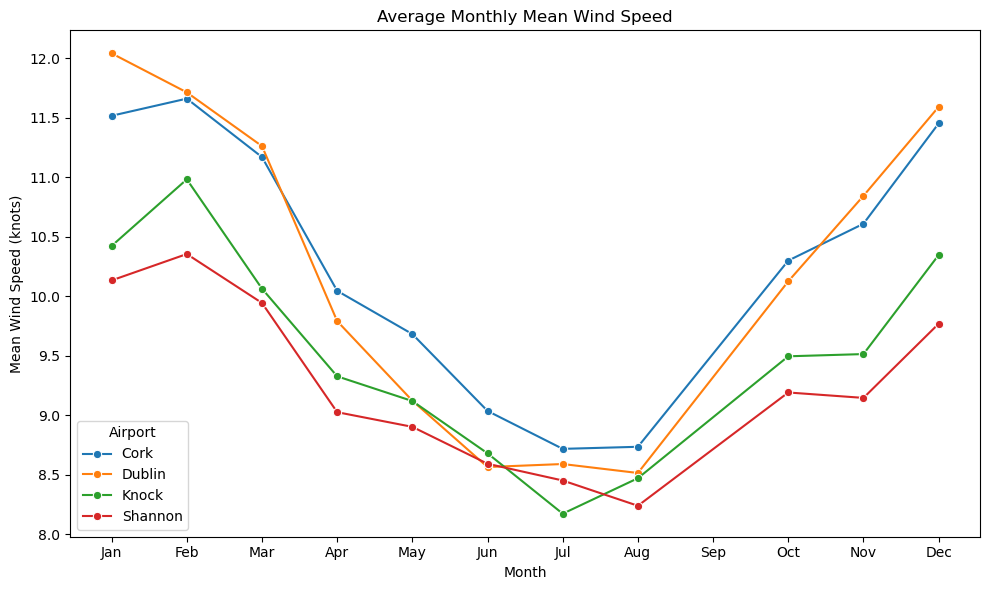

In [45]:
# Ensure Date column is datetime
all_airports['Date'] = pd.to_datetime(all_airports['Date'], errors='coerce', dayfirst=True)

# Extract month
all_airports['Month'] = all_airports['Date'].dt.month

# Convert wind speed to numeric for aggregation
all_airports['Mean_Wind_Speed(knots)'] = pd.to_numeric(all_airports['Mean_Wind_Speed(knots)'], errors='coerce')

monthly = (
    all_airports
    .groupby(['Airport', 'Month'])['Mean_Wind_Speed(knots)']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=monthly,
    x='Month',
    y='Mean_Wind_Speed(knots)',
    hue='Airport',
    marker='o'
)

plt.title('Average Monthly Mean Wind Speed')
plt.xlabel('Month')
plt.ylabel('Mean Wind Speed (knots)')


# Set x-ticks as month names.
# See: https://stackoverflow.com/questions/46263392/add-months-to-xaxis-and-legend-on-a-matplotlib-line-plot

month_names = [calendar.month_abbr[m] for m in range(1, 13)]
plt.xticks(ticks=range(1, 13), labels=month_names)

plt.tight_layout()
plt.show()


__Insights:__

Is clear that all four airports show strong seasonality in wind speeds. Winter shows being the windiest and Summer shows being the calmest. Cork and Dublin are generally windier than Knock and Shannon, but the overall pattern is consistent across all locations.

### __Investigation on how the wind directions and strenghts of maximum wind gusts at the airports vary by seasons.__

Mean wind speed describes typical conditions. However, maximum gusts and wind direction are essential for assessing the true operational and safety risks, such as cross winds and turbulence in aviation. See [www.rikasensor.com](https://www.rikasensor.com/a-how-does-wind-speed-measurement-help-in-aviation-and-air-traffic-control.html) for more information on how wind speed measturements help in Avation adn Air Control.

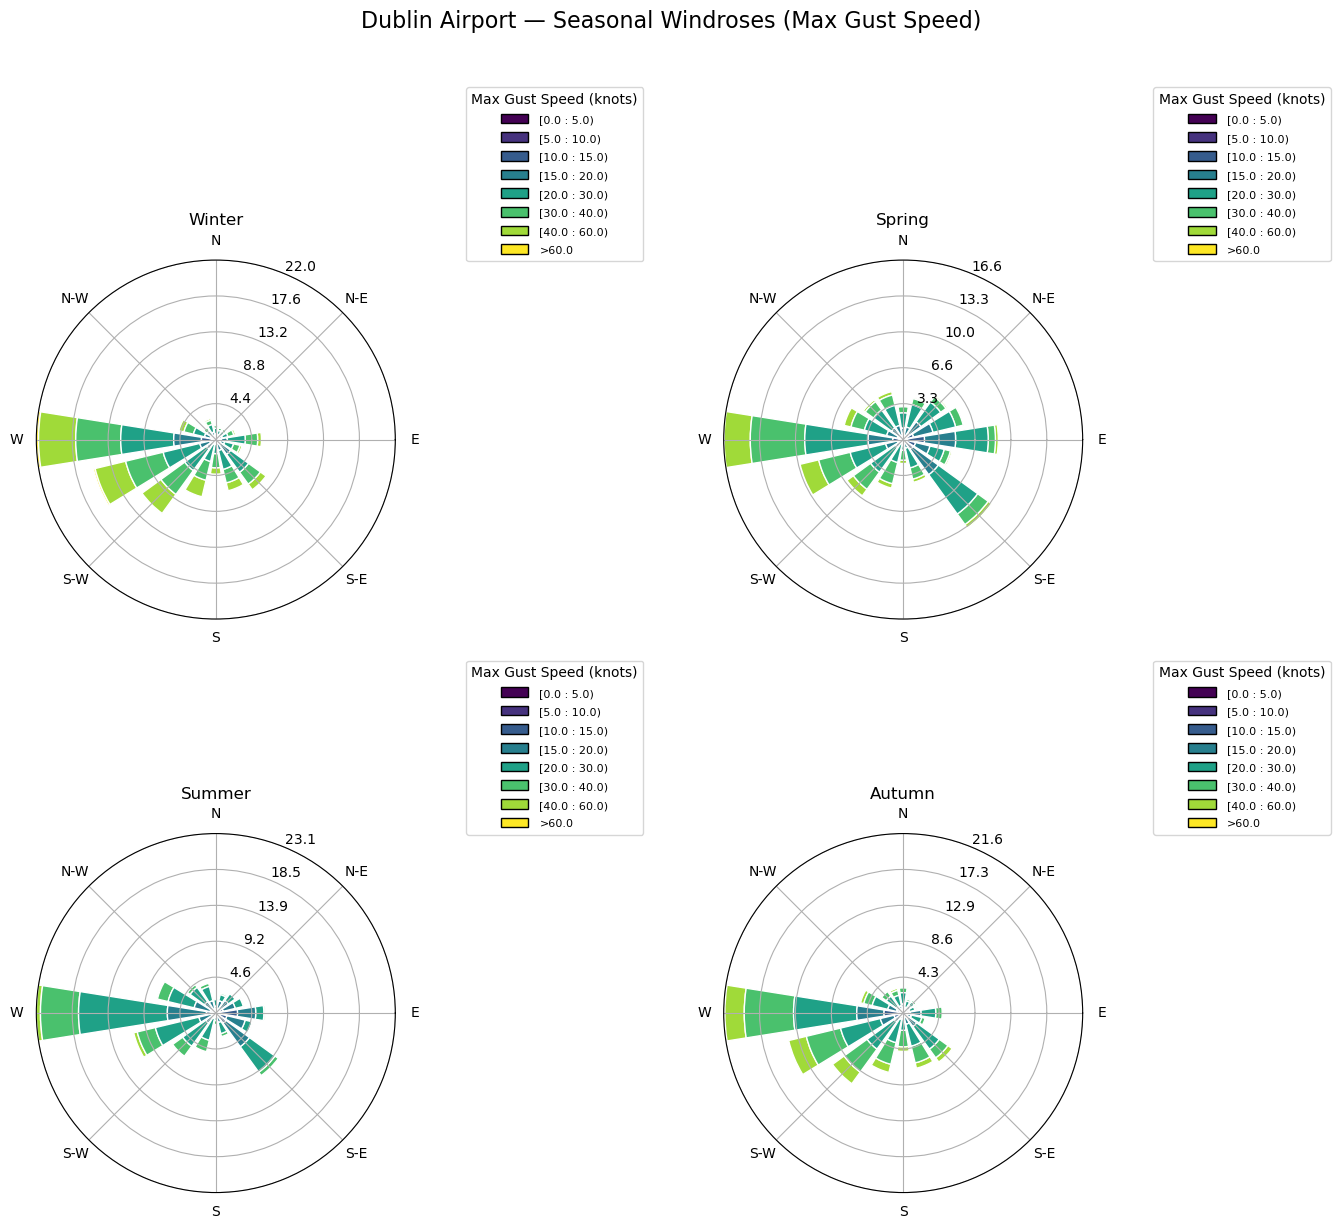

In [46]:
# Windrose for Dublin Airport of the Max Gust Speed by Season.
# See: https://python-windrose.github.io/windrose/usage-output.html)

seasons = ["Winter", "Spring", "Summer", "Autumn"]
fig = plt.figure(figsize=(14, 12))

for i, season in enumerate(seasons, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[(all_airports['Airport'] == 'Dublin') & (all_airports['Season'] == season)].copy()

    # Convert to numeric and drop missing values.
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    # Check for valid data.
    if not mask.any():
        ax.set_title(f"{season}\n(no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )
    ax.set_title(f"{season}", fontsize=12)
    ax.set_legend(title="Max Gust Speed (knots)", bbox_to_anchor=(1.2, 1))

fig.suptitle("Dublin Airport — Seasonal Windroses (Max Gust Speed)", fontsize=16, y=1.02)
plt.tight_layout()

# plt.savefig('Dublin_Airport_Seasonal_Windrose_Max_gust')
plt.show()

__Dublin Airport__ 


__Winter__ has the highest gust frequencies and speeds are observed in winter. I see there is a strong concentration of high gusts from the west and southwest. 

__Spring and Autumn__  demonstrate a similar pattern to winter, but with lower frequencies and maximum gust speeds. The westerly dominance remains, but the distribution is a bit more spread out.

__Summer__ has the lowest frequencies and intensities of maximum gusts. The windrose is less “filled,” indicating calmer conditions overall, but the westerly direction is still the main concentration of winds.

__In summary__,  Dublin Airport is most exposed to strong gusts from the west and southwest, especially in winter. Seasonal variation is clear, with winter showing the most severe gusts and summer the mildest. This pattern highlights the operational challenges during the winter months.

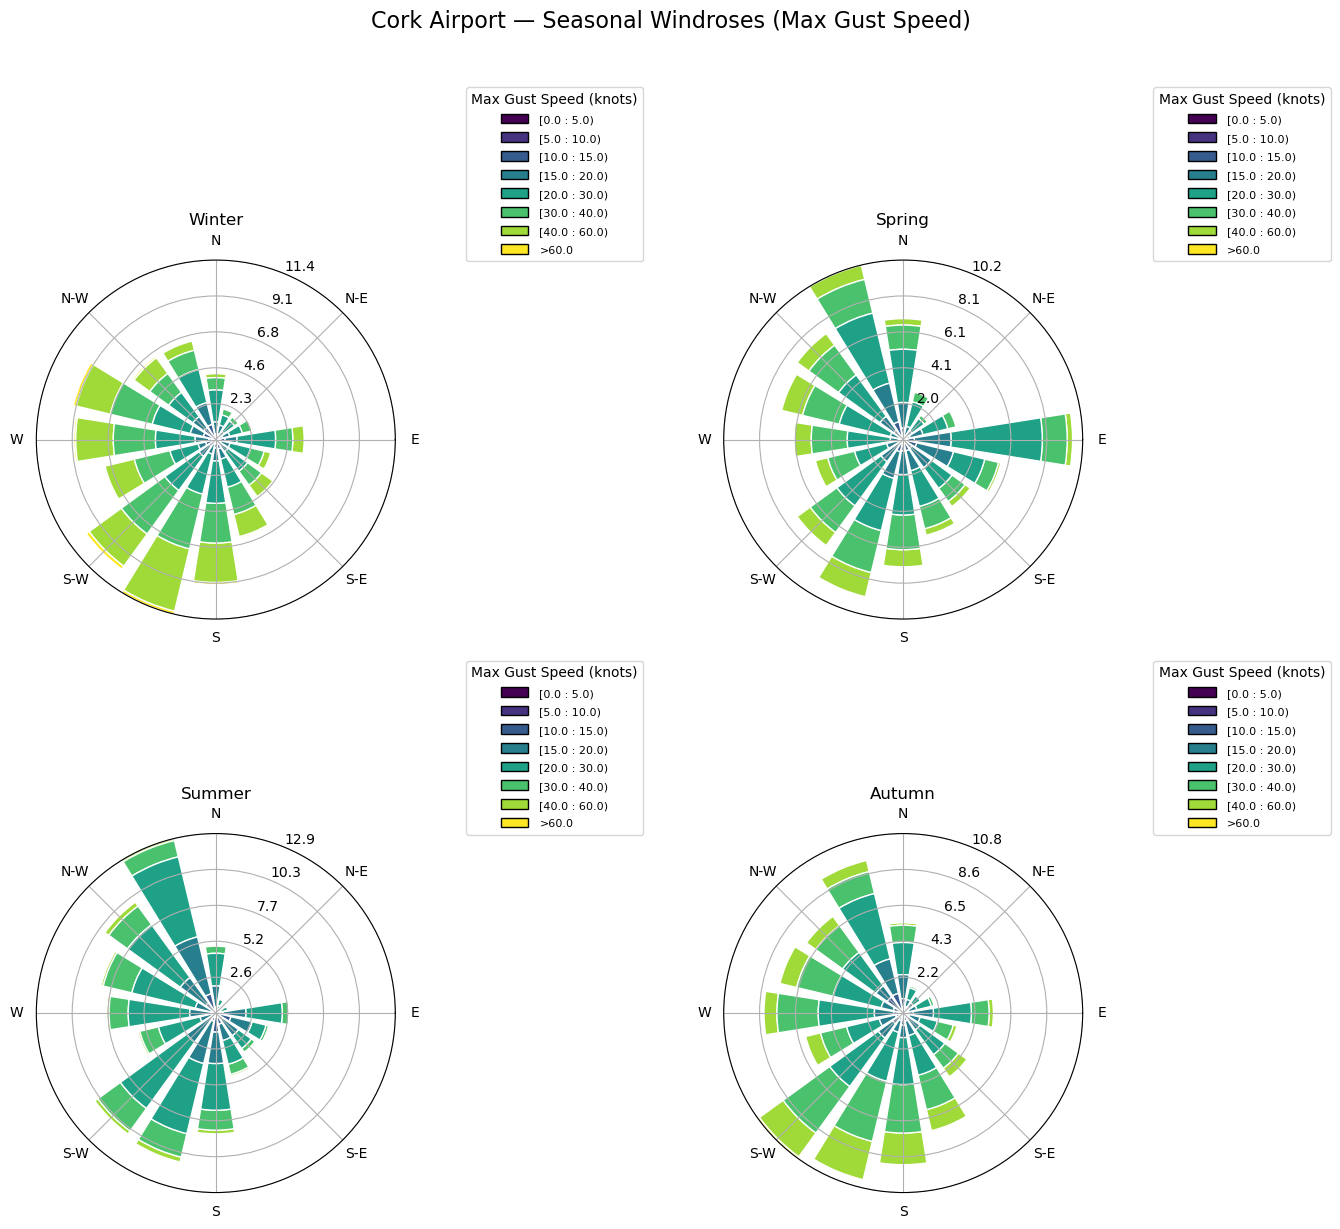

In [47]:
# Windrose for Cork Airport of the Max Gust Speed by Season.
# See: https://python-windrose.github.io/windrose/usage-output.html)

seasons = ["Winter", "Spring", "Summer", "Autumn"]
fig = plt.figure(figsize=(14, 12))

for i, season in enumerate(seasons, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[(all_airports['Airport'] == 'Cork') & (all_airports['Season'] == season)].copy()

    # Convert to numeric and drop missing values.
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    # Check for valid data.
    if not mask.any():
        ax.set_title(f"{season}\n(no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )
    ax.set_title(f"{season}", fontsize=12)
    ax.set_legend(title="Max Gust Speed (knots)", bbox_to_anchor=(1.2, 1))
fig.suptitle("Cork Airport — Seasonal Windroses (Max Gust Speed)", fontsize=16, y=1.02)
plt.tight_layout()

# plt.savefig('Cork_Airport_Seasonal_Windrose_Max_gust')
plt.show()

__Cork Airport__


__Winter__ gusts are frequent and strong, especially from the southwest and west. I can see that the windrose is well-filled, indicating a high frequency of strong gusts in these directions.

__Spring__ Gusts remain frequent but are generally less intense than in winter. The southwest and west directions still dominate, but there is a slightly broader spread.

__Summer__ I notice that the gusts are less frequent and generally weaker, but there is still a notable presence of strong gusts from the southwest and west. The windrose is less filled, indicating calmer conditions overall.

__Autumn__ Gusts increase again compared to summer, with a pattern similar to winter and spring. The southwest and west remain the dominant directions for strong gusts.


__In Summary__ Cork Airport is most exposed to strong gusts from the southwest and west, especially in winter and autumn. The seasonal variation is clear, with winter and autumn showing the most severe gusts and summer the mildest. 

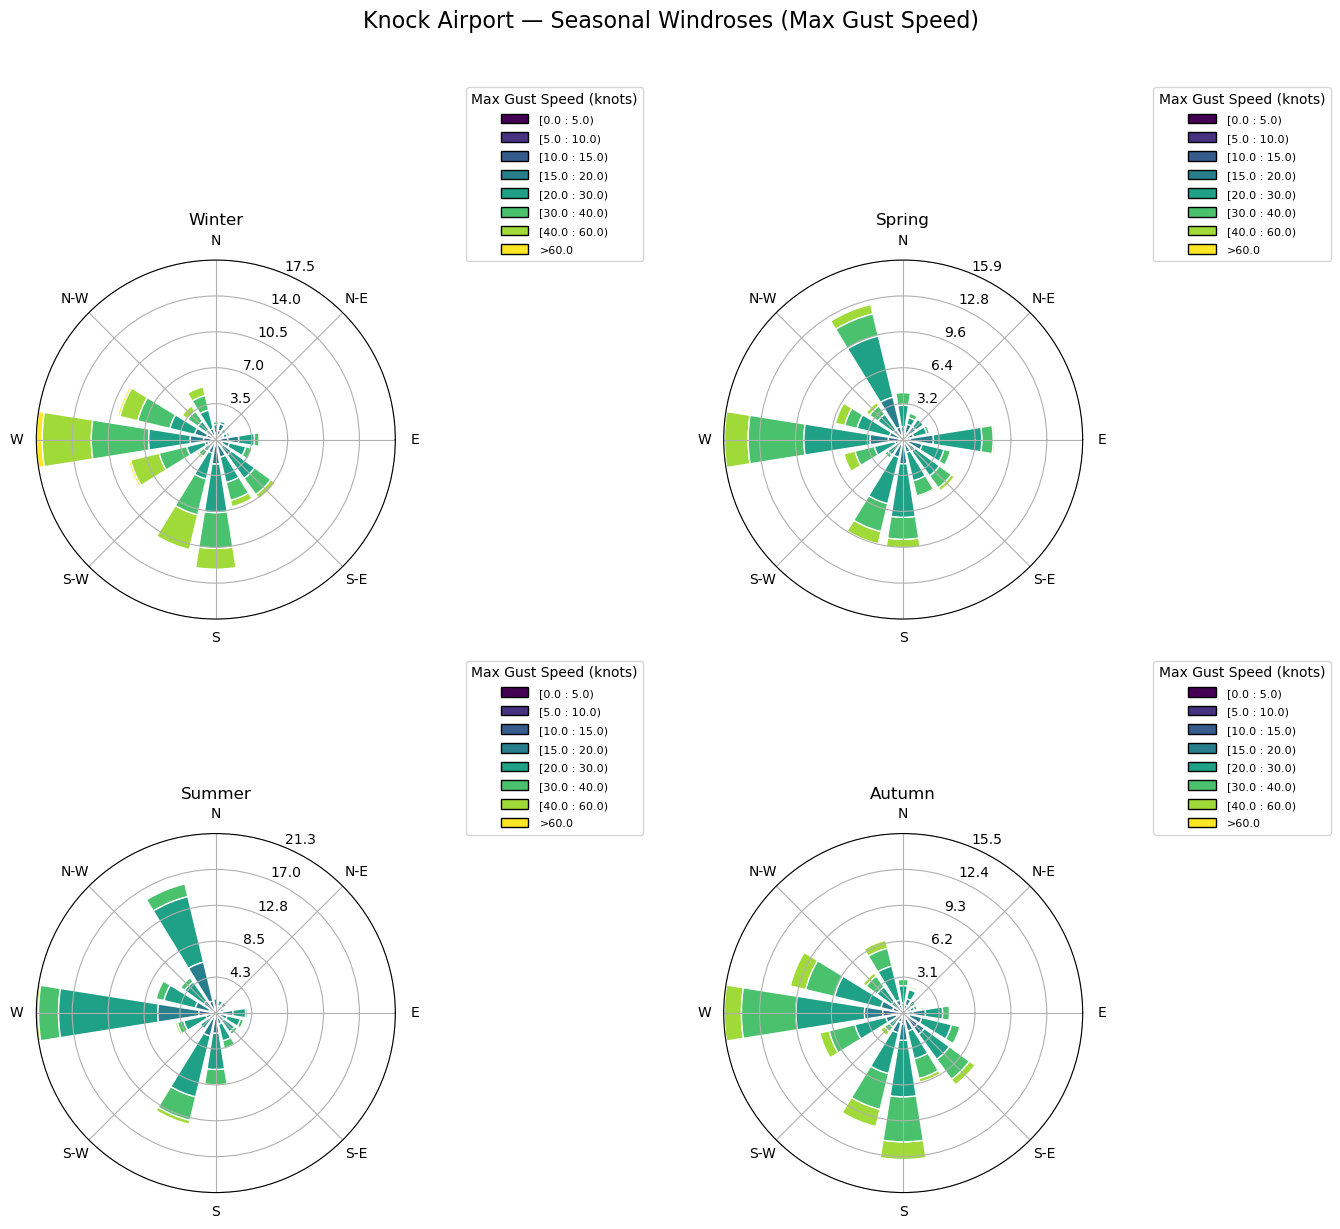

In [48]:
# Plot Windrose for Knock Airport of Max Gust Speed by Season.
# See: https://python-windrose.github.io/windrose/usage-output.html)

seasons = ["Winter", "Spring", "Summer", "Autumn"]
fig = plt.figure(figsize=(14, 12))

for i, season in enumerate(seasons, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[(all_airports['Airport'] == 'Knock') & (all_airports['Season'] == season)].copy()

    # Convert to numeric and drop missing values
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    # Check for valid data.
    if not mask.any():
        ax.set_title(f"{season}\n(no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )   
    ax.set_title(f"{season}", fontsize=12)
    ax.set_legend(title="Max Gust Speed (knots)", bbox_to_anchor=(1.2, 1))

fig.suptitle("Knock Airport — Seasonal Windroses (Max Gust Speed)", fontsize=16, y=1.02)
plt.tight_layout()

#plt.savefig('Knock_Airport_Seasonal_Windrose_Max_gust.png')
plt.show()

__Knock Airport__


__Winter__ gusts are frequent and strong, especially from the west and northwest. The windrose shows a wide spread, indicating gusts from multiple directions, but the west is dominant.

__Spring__ gusts remain frequent, with the west and northwest still dominant, but I observe that the overall intensity is slightly lower than winter. There is a broader spread of directions.

__Summer__ gusts are less frequent and generally weaker, but there is a notable presence of gusts from the north and northwest. The windrose is less filled, indicating calmer conditions overall.

__Autumn__ gusts increase again compared to summer, with a pattern similar to winter and spring. The west and northwest remain the dominant directions for strong gusts.


__In summary__, Knock Airport is exposed to strong gusts from the west and northwest, especially in winter and autumn. The wind direction is more variable than at the other airports, this could be likely due to its inland and elevated location. Seasonal variation is clear, with winter and autumn showing the most severe gusts and summer the mildest. 

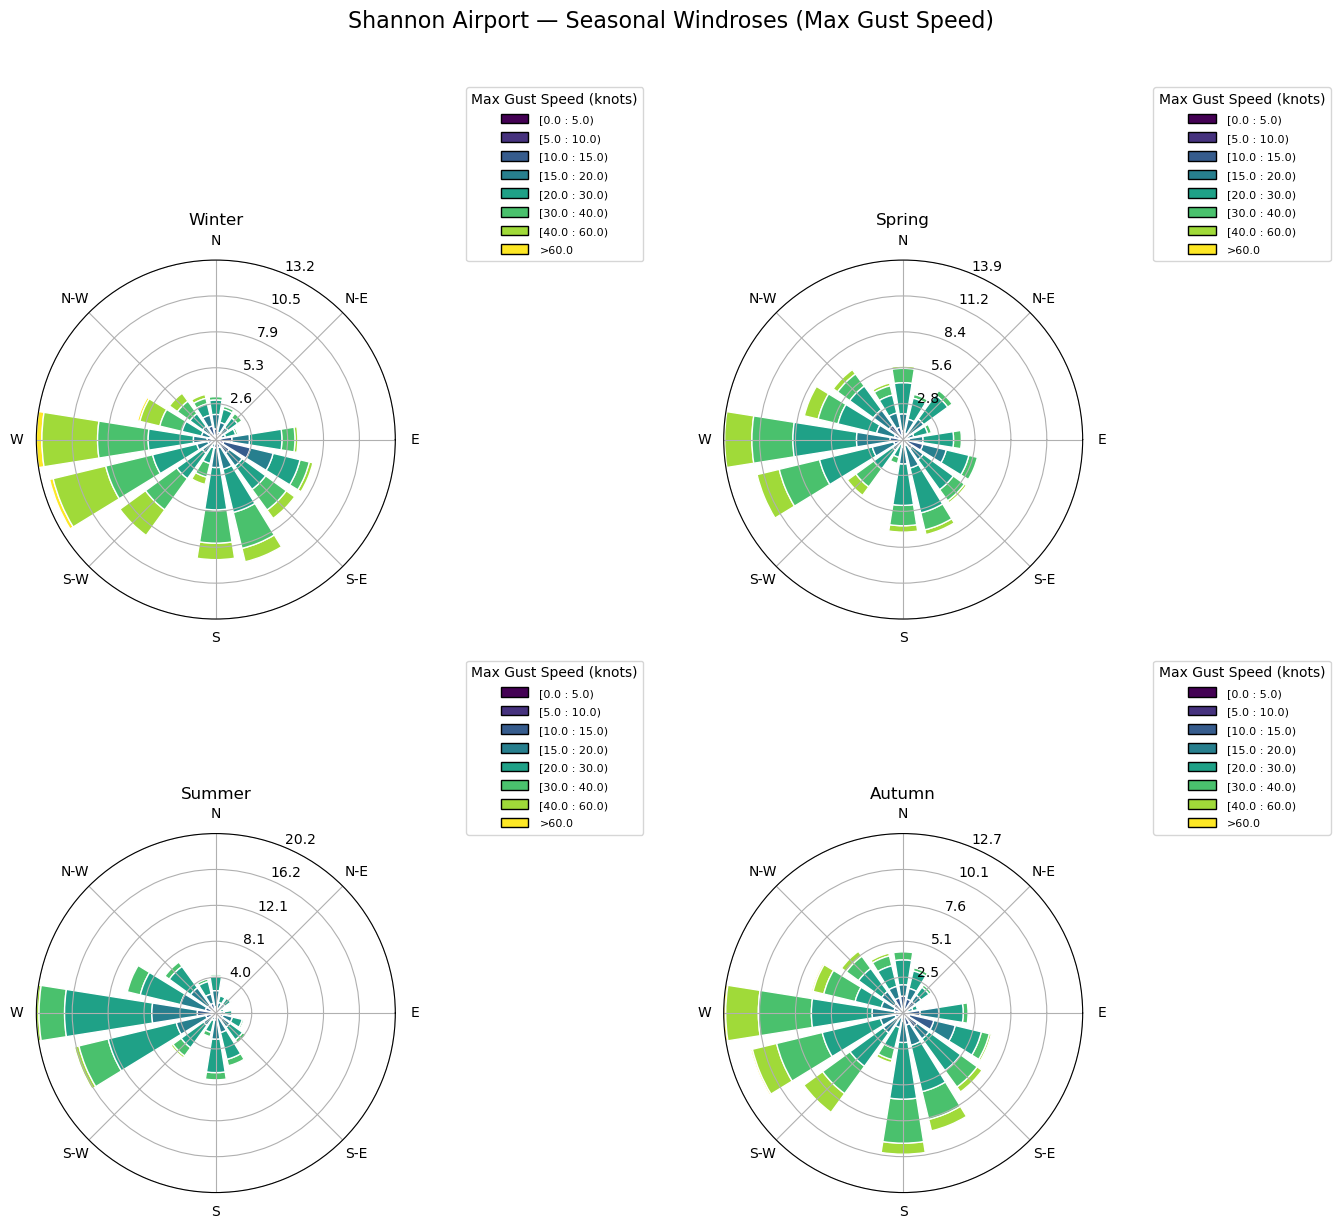

In [49]:
# Plot Windrose for Shannon Airport of Max Gust Speed by Season.
# See: https://python-windrose.github.io/windrose/usage-output.html)

seasons = ["Winter", "Spring", "Summer", "Autumn"]
fig = plt.figure(figsize=(14, 12))

for i, season in enumerate(seasons, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[(all_airports['Airport'] == 'Shannon') & (all_airports['Season'] == season)].copy()

    # Convert to numeric and drop missing values.
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    # Check for valid data.
    if not mask.any():
        ax.set_title(f"{season}\n(no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{season}", fontsize=12)
    ax.set_legend(title="Max Gust Speed (knots)", bbox_to_anchor=(1.2, 1))

fig.suptitle("Shannon Airport — Seasonal Windroses (Max Gust Speed)", fontsize=16, y=1.02)
plt.tight_layout()

# plt.savefig('Shannon_Airport_Seasonal_Windrose_Max_Gust')
plt.show()

__Shannon Airport__

__Winter__ gusts are distributed across many directions, but there is a slight dominance from the west and southwest.
There is high gust intestity with frequent entries of 30-40 knots, 40-60 knots and even some > 60 knots which stands out compared to the other seasons.

__Spring__ gusts come from a variety of directions, but again, the west and southwest are prominent. Gust intesity is in at the 10-30 knot range. Not many coming in plus 40 knots. 

__Summer__ gusts see a noticeable decrease in both the frequency and intensity of gusts from the west and southwest mostly come in under 20 knots. 

__Autumn__ gusts returns to being more similar to winter and spring, with the west and southwest directions again being dominant. The spread is moderate, more focused than Spring but less than Winter.
Gust speeds are moderate, with entries cmainly coming in at 30-40 knots from the west.


__In Summary__, Shannon Airport experiences its strongest and most frequent wind gusts from the west and southwest, especially during the winter. 

__Overall Insight__ 

 I can clearly see that Winter is the common month where the airports experience the windiest weather. Next I will compare the four airports side by side to see how they fare in the Winter and to see which airport experiences the windiest conditions.

### Investigation on the most Directionally Dominant and Gust-Intense Airport during Winter.

Winter has been identified as the season that most impacts the airports, so during this season which airport is the most directionally dominant and Gust-Intense Airport?

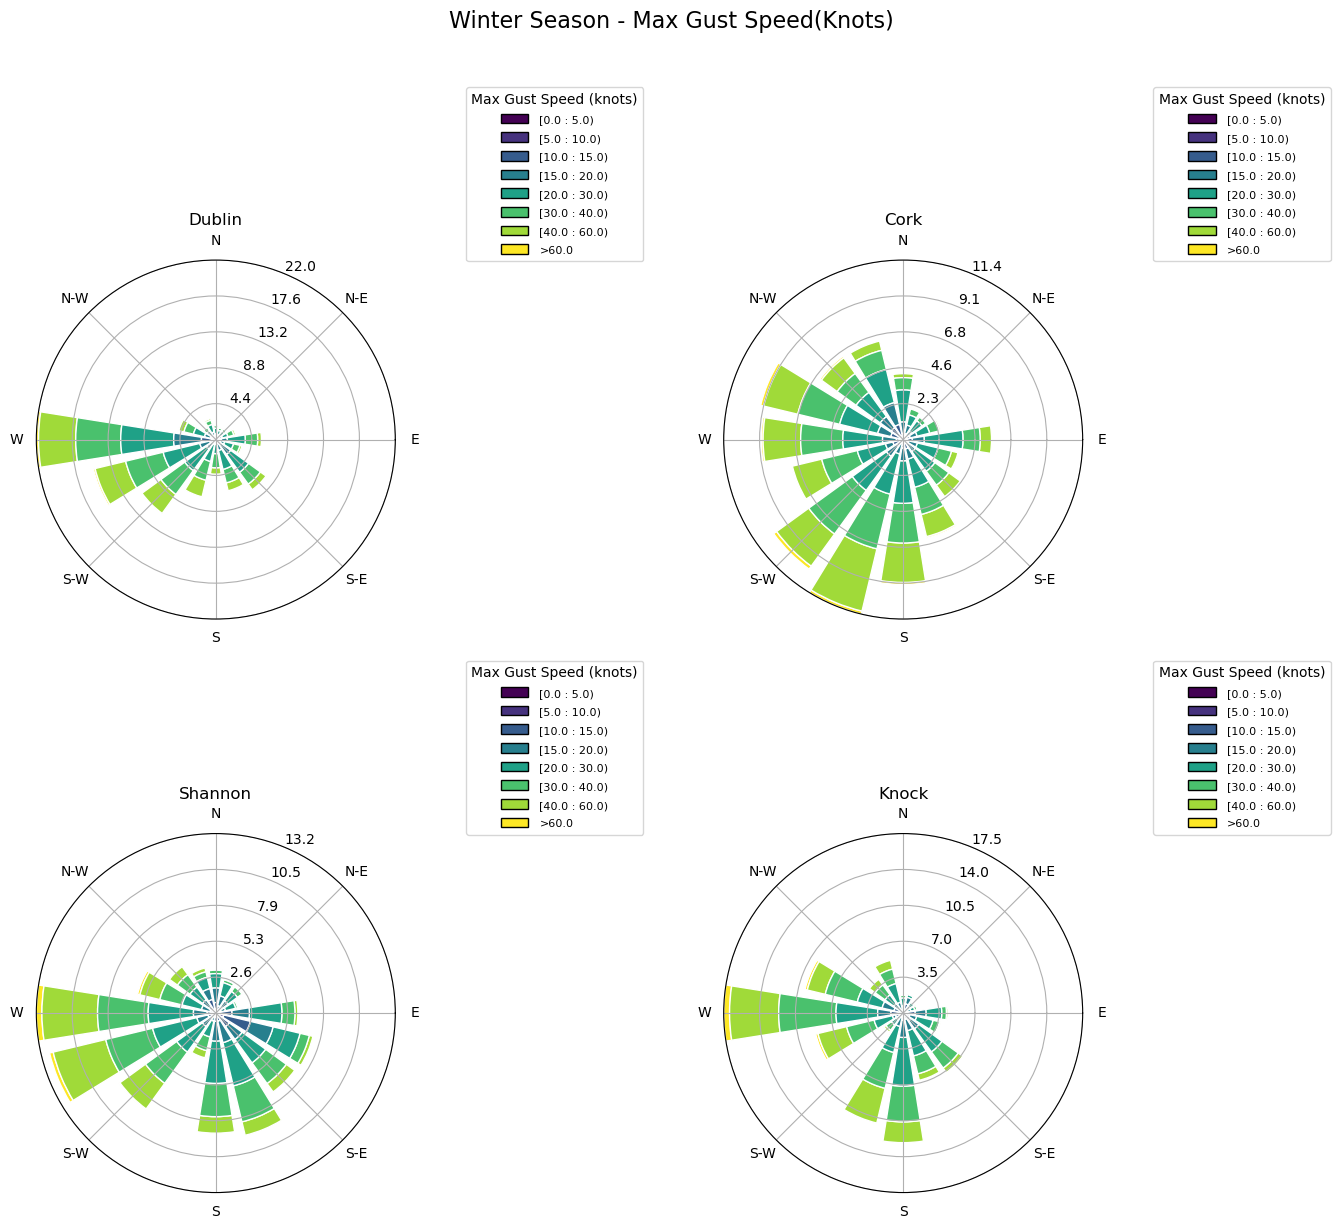

In [50]:
# Plot windrose for all the airports for Winter Months.

airports = ["Dublin", "Cork", "Shannon", "Knock"]
fig = plt.figure(figsize=(14, 12))

for i, airport in enumerate(airports, 1):
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    
    # Filter for all airports and then winter only.
    data = all_airports[
        (all_airports['Airport'] == airport) &
        (all_airports['Season'] == "Winter")
    ].copy()

    # Convert to numeric and drop missing values.
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    # Check for valid data.
    if not mask.any():
        ax.set_title(f"{airport}\n(no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{airport}", fontsize=12)
    ax.set_legend(title="Max Gust Speed (knots)", bbox_to_anchor=(1.2, 1))

fig.suptitle("Winter Season - Max Gust Speed(Knots)", fontsize=16, y=1.02)
plt.tight_layout()

# plt.savefig('Winter_Season_Max_Gust_Speed(Knots)_all_Airports')
plt.show()


__Gust Intestity:__

I can see that Dublin Airport shows the highest maximum gust values of all four airports.

_Dublin Airport:_ up to 22 knots

_Knock Airport:_ up to 17.5 knots

_Shannon Airport:_ up to 13.2 knots

_Cork Airport:_ up to 11.4 knots


__Directional Dominance:__

I notice from this windrose that Dublin Airport's winter gusts are not only strong, they are highly directional, with a very strong concentration of gusts from the west and southwest. 

Where as in contrast:

_Cork Airport:_ gusts mostly from the south and south west, but these are weaker

_Shannon Airport:_ gusts from the south and south west, but they are less intense

_Knock Airports:_ gusts from the west and north west, but they appear more spread out and less consistent

__In conclusion,__ Dublin Airport has both the tightest directional clustering and the highest gust magnitudes.

### Investigation on most the Frequently Gusty Airport during Winter.

I will shift the focus from intensity to frequency for this next analysis. Dublin is the most directionally dominant and gust intense airport during the Winter, but which one has the highest frequency of gust-intensty at this time of year?

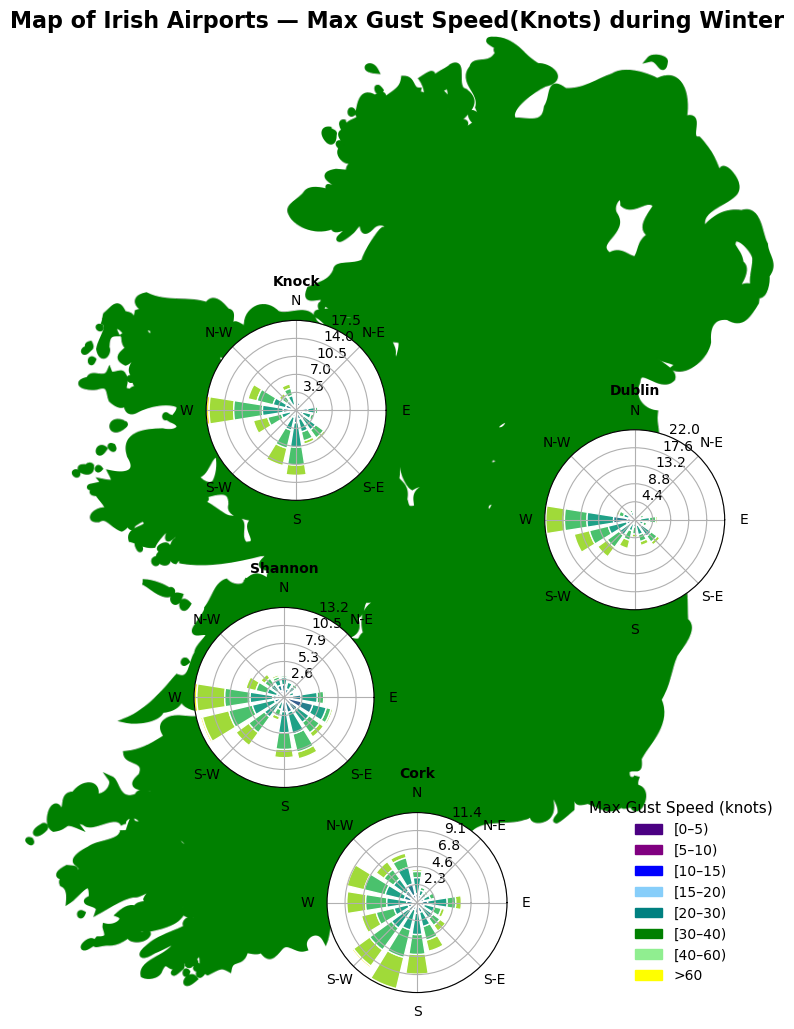

In [51]:
# Load Ireland map using mpimg imread.
# See: https://stackoverflow.com/questions/35286540/how-to-display-an-image

img = mpimg.imread("Map of Ireland.png")
fig = plt.figure(figsize=(10, 14))

# Add subplot to the map image.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.add_subplot.html
ax_map = fig.add_subplot(1, 1, 1)

# Display the image inside the axis.
ax_map.imshow(img)

# Turn off x and y lables for readaboility.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axis.html
ax_map.axis("off")
ax_map.set_title("Map of Irish Airports — Max Gust Speed(Knots) during Winter", fontsize=16, weight='bold')

# Airport pixel positions. 
# (Manually configured through test placements).

airport_positions = {
    "Dublin": (620, 520),
    "Cork": (440, 800),
    "Shannon": (330, 650),
    "Knock": (340, 440)
}

# Create windrose for each airport for Winter using for loop.
for airport, (x, y) in airport_positions.items():
    data = all_airports[
        (all_airports['Airport'] == airport) &
        (all_airports['Season'] == "Winter")
    ].copy()

    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Gust_Speed(knots)'], errors='coerce')
    mask = directions.notna() & speeds.notna()

    if not mask.any():
        continue
    
    # Create small axis inside the figure. 
    # See: https://python-windrose.github.io/windrose/usage-output.html

    inset_ax = fig.add_axes([0, 0, 0.18, 0.18], projection='windrose')
    inset_ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )
    inset_ax.set_title(airport, fontsize=10, weight='bold')

    # Position inset.
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_position.html
    inset_ax.set_position([
        x / img.shape[1] - 0.09,
        1 - (y / img.shape[0]) - 0.09,
        0.18,
        0.18
    ])

# Define bin colors manually (same as windrose bins).
# Dummy data was showing behind legend, assisted by ChatGBT here to clean up:
# https://chatgpt.com/share/69640941-c84c-800c-9d9a-339a0418d330

bin_colors = [
    "#4B0082",  # [0–5] dark purple
    "#800080",  # [5–10] purple
    "#0000FF",  # [10–15] blue
    "#87CEFA",  # [15–20] light blue
    "#008080",  # [20–30] teal
    "#008000",  # [30–40] green
    "#90EE90",  # [40–60] light green
    "#FFFF00"   # >60 yellow
]

bin_labels = [
    "[0–5)", "[5–10)", "[10–15)", "[15–20)", "[20–30)", "[30–40)", "[40–60)", ">60"
]

# Create legend patches.
legend_patches = [Patch(color=c, label=l) for c, l in zip(bin_colors, bin_labels)]

# Add legend to main map axis.
ax_map.legend(handles=legend_patches, title="Max Gust Speed (knots)",
              loc='lower right', fontsize=10, title_fontsize=11, frameon=False)


# plt.savefig('Ireland_Windroses_Map_Winter_Max_Gust_Speed.png')
plt.show()


_Note: The following insights can be also be reviewed by looking back on the Winter Windrose data in the previous cell but I have plotted the data over a map of Ireland to get a sense of the geographical location of the airports._

__Gust Frequency:__

_Dublin Airport:_ has the highest gusts, but they’re more directionally concentrated. So fewer directions and fewer events.

_Shannon Airport:_ has many gust events from multiple directions, making it the most frequently gusty airport in winter.

_Knock Airport:_ shows strong gusts but these are less frequent. There are fewer bars overall.

_Cork Airport:_ is calm and sparse. I note that it has the lowest frequency and intensity.


__In conclusion,__ Shannon Airport's location near the Atlantic coast likely contributes to forceful and consistent winter winds. The winter wind profile suggests to me that there could be an operational impact. Strong consistent gusts from a consistent direction could affect runway alignment, crosswinds, aircraft handling, and ground operations.



### Winter Gust Porfile Compared across the Four Airports.



| Airport  | Dominant Direction | Gust Intensity (Peak) | Gust Frequency | Directional Spread |
|----------|--------------------|------------------------|----------------|---------------------|
| **Dublin**  | W–SW               | **Highest** (22 knots)   | Moderate       | Tight, highly focused |
| **Shannon** | SW–W               | Moderate (13.2 knots)    | **Highest**    | Broad western spread  |
| **Knock**   | W–NW               | High (17.5 knots)        | Low            | Wide, multi‑sector    |
| **Cork**    | S–SW               | Lowest (11.4 knots)      | Low            | Narrow, southerly     |


## Storm Clustering 



## Are there periods where several stormy days happen close together?”

First I will need to find out what wind speed consitutes as a storm day. According to the [Beaufort Scale](https://en.wikipedia.org/wiki/Beaufort_scale#Modern_scale), 48 knots and above counts as a storm.

For every date this speed is recorded, I will count how many storm days occured. Then I will flag this a storm cluster. This will be if 3 or more storm days happen within a 7 day window.



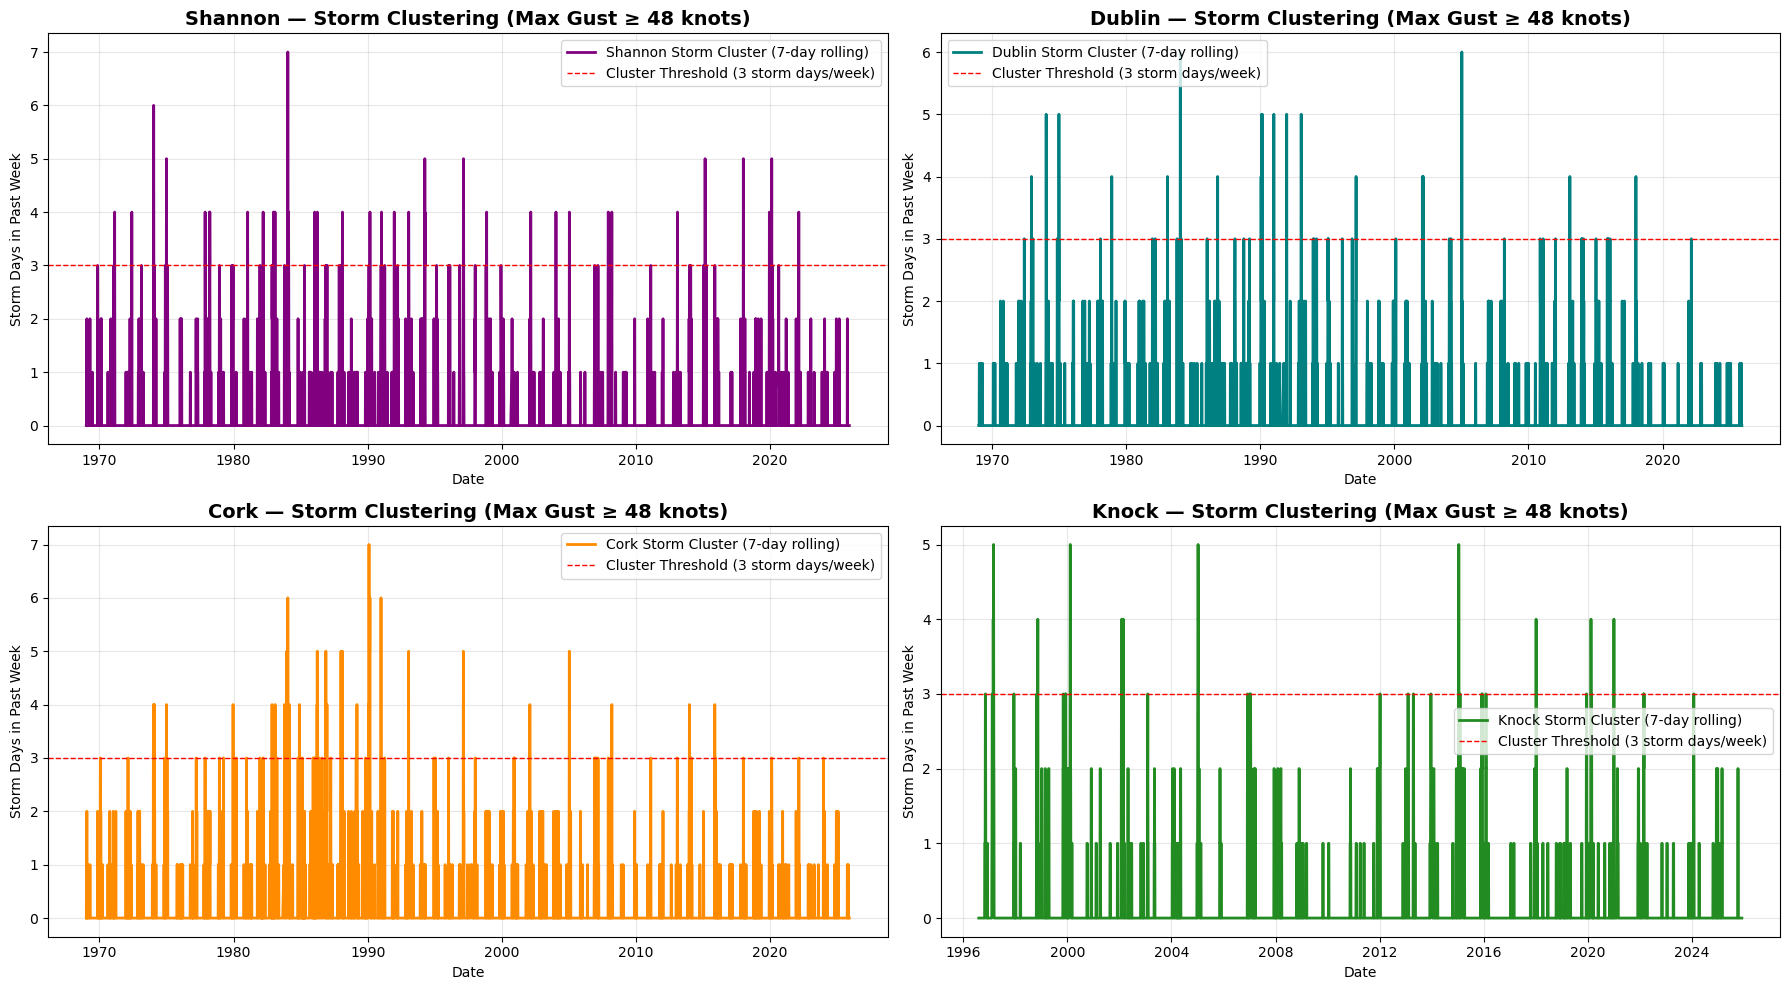

In [70]:
# Define function to compute storm cluster series for an airport.
def compute_storm_cluster_series(df, airport_name, storm_threshold=48, cluster_cutoff=3):

    dfa = df[df['Airport'] == airport_name].copy()

    # Ensure datetime.
    dfa['Date'] = pd.to_datetime(dfa['Date'], errors='coerce')

    # Filter to 2025 and earlier.
    dfa = dfa[dfa['Date'] <= '2025-12-31']
    
    # sort dates chronologically for rolling windows.
    dfa = dfa.sort_values('Date')

    # Convert gusts to numeric to prevent errors.
    dfa['Max_Gust_Speed(knots)'] = pd.to_numeric(
        dfa['Max_Gust_Speed(knots)'], errors='coerce'
    )

    # Define storm event.
    dfa['Storm'] = dfa['Max_Gust_Speed(knots)'] >= storm_threshold

    # Rolling 7‑day storm cluster.
    dfa['Storm_Cluster'] = dfa['Storm'].rolling(window=7).sum()

    # Flag cluster periods.
    dfa['Cluster_Flag'] = dfa['Storm_Cluster'] >= cluster_cutoff

    return dfa

# List of airports.
airports = ["Shannon", "Dublin", "Cork", "Knock"]

# Set colours for each airport.
airport_colours = {
    "Shannon": "purple",
    "Dublin": "teal",
    "Cork": "darkorange",
    "Knock": "forestgreen"
}

storm_series = {
    airport: compute_storm_cluster_series(all_airports, airport)
    for airport in airports
}

# Create subplot.
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Flatten() to make it easier to loop through.
axes = axes.flatten()

for ax, airport in zip(axes, airports):
    dfa = storm_series[airport]

    # Plot the time series over 7 days rolling.
    ax.plot(
        dfa['Date'], dfa['Storm_Cluster'],
        color=airport_colours[airport],
        linewidth=2,
        label=f"{airport} Storm Cluster (7‑day rolling)"
    )

    # Add horizontal threshold line at the 3 day mark.
    # See: https://www.geeksforgeeks.org/python/matplotlib-axes-axes-axhline-in-python/

    ax.axhline(3, color='red', linestyle='--', linewidth=1,
               label="Cluster Threshold (3 storm days/week)")

    ax.set_title(f"{airport} — Storm Clustering (Max Gust ≥ 48 knots)",
                 fontsize=14, weight='bold')
    ax.set_xlabel("Date")
    ax.set_ylabel("Storm Days in Past Week")
    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()

# plt.savefig('Storm_Clustering_Plot')
plt.show()


### Insights:

__Shannon Airport:__ I can see frequent and intense clusters. There are multiple periods that exceed the threshold. This would mean Shannon Airports is storm-prone, with sustained multi-day gust events. There could be high operational risk during peak storm seasons.

__Dublin Airport:__ There is moderate clustering happening here with fewer threshold breaches than Shannon. While I can see some isolated spikes which suggest that Dublin Airport sees episodic storm activity, they have less frequent clustering. This is still relevant for aviation planning, especially in the winter.

__Cork Airport:__  I can see there is sparse storm clustering with most values staying below the threshold. Overall, Cork is comparatively calm, with low storm clustering. Likely lowest wind disruption risk.

__Knock Airport:__ There is some intermittent clustering, with some threshold breaches. I notice there is more volatility than Cork, but less than Shannon.

__In Summary:__ Shannon Airport standouts for frequent, sustained storm clusters. This makes it a hotspot for wind-driven disruption. This would reinforce my earlier insight that Shannon airport is the most frequently gusty airport of the four. Dublin and Knock show episodic risk, with Dublin more stable and Knock more erratic. Cork is the least storm-clustered, reinforcing its calm profile from my earlier KDE and box plots.

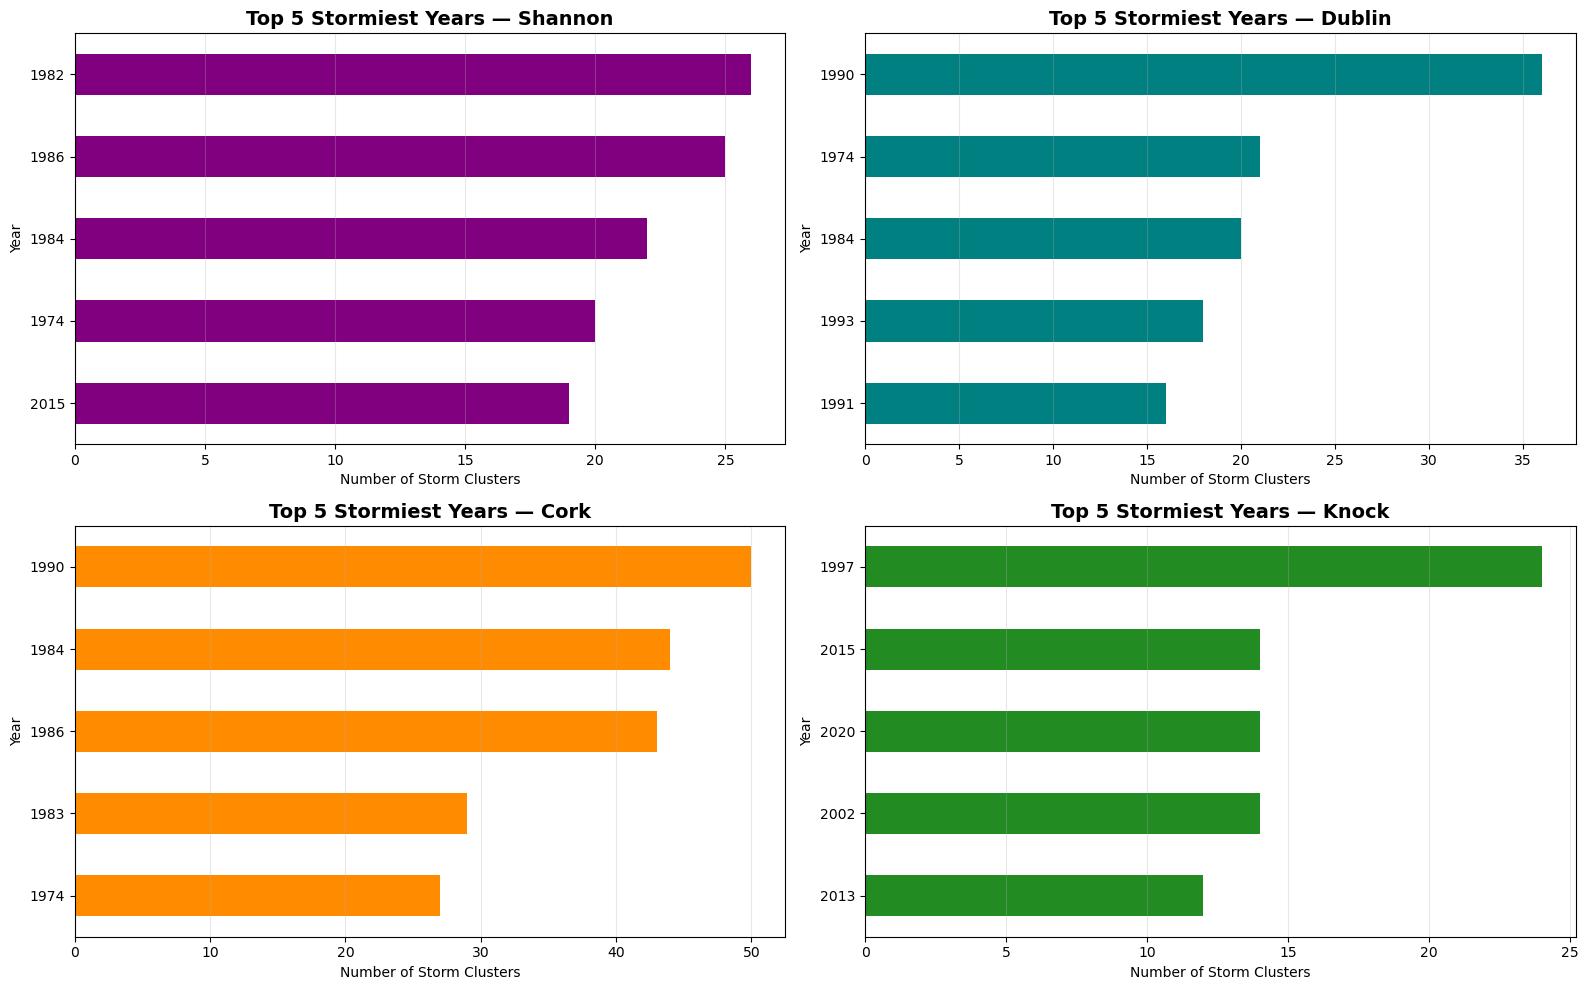

In [79]:
# Define function using storm cluster data.
def top5_storm_years(df, airport_name, storm_threshold=48, cluster_cutoff=3):

    # Filter to airport.
    dfa = df[df['Airport'] == airport_name].copy()

    # Ensure datetime and filter to 2025 and earlier.
    dfa['Date'] = pd.to_datetime(dfa['Date'], errors='coerce')
    dfa = dfa[dfa['Date'] <= '2025-12-31']
    dfa = dfa.sort_values('Date')

    # Convert gust column to numeric.
    dfa['Max_Gust_Speed(knots)'] = pd.to_numeric(
        dfa['Max_Gust_Speed(knots)'], errors='coerce'
    )

    # Define storm event.
    dfa['Storm'] = dfa['Max_Gust_Speed(knots)'] >= storm_threshold

    # Rolling 7‑day storm cluster.
    dfa['Storm_Cluster'] = dfa['Storm'].rolling(window=7).sum()

    # Flag cluster periods.
    dfa['Cluster_Flag'] = dfa['Storm_Cluster'] >= cluster_cutoff

    # Count clusters per year.
    dfa['Year'] = dfa['Date'].dt.year

    # See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
    # See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html
    cluster_yearly = dfa[dfa['Cluster_Flag']].groupby('Year').size()

    #  Return Top 5 stormiest years from most to fewest using head().
    top5_storm_years = cluster_yearly.sort_values(ascending=False).head(5)

    return top5_storm_years


# list of airports.
airports = ["Shannon", "Dublin", "Cork", "Knock"]

# Assign colours.
airport_colours = {
    "Shannon": "purple",
    "Dublin": "teal",
    "Cork": "darkorange",
    "Knock": "forestgreen"
}

# Create dictionary to store results for each airport.
top5_data = {
    airport: top5_storm_years(all_airports, airport)
    for airport in airports
}

# Plot 2 x 2 grid subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Set up loop,
for ax, airport in zip(axes, airports):
    data = top5_data[airport]

    # Check there is at least one storm year to plot.
    if len(data) > 0:

        # Sort the data highest to lowest on horizontal bar chart.
        data.sort_values().plot(kind='barh',
                                color=airport_colours[airport],
                                ax=ax)

        ax.set_title(f"Top 5 Stormiest Years — {airport}",
                     fontsize=14, weight='bold')
        ax.set_xlabel("Number of Storm Clusters")
        ax.set_ylabel("Year")
        ax.grid(axis='x', alpha=0.3)
    else:
        ax.set_title(f"{airport} — No Data", fontsize=14, weight='bold')
        ax.axis('off')

plt.tight_layout()

plt.savefig('top_5_stormiest_years_per_airport')
plt.show()


__Insights:__

_Cork Airport:_ stands out to me as the most storm-active, especially in 1990, with nearly 50 clusters.

_Dublin Airport:_ peaks in 1990 too, but with there are fewer clusters compared to Cork, with just over 35.

_Shannon Airport:_ shows consistent storminess in the 1980s, especially 1982, 1984 and 1986, with 20–26 clusters per year.

_Knock Airport:_ has lower overall counts, with its peak in 1997 of just under 25. I can see there is more recent activity in 2015–2020 also.

This highlights regional variation through the past few decades in storm clusters across Ireland. Cork Airport and Shannon Airport were most affected the 1980s, Dublin spikes in 1990, and Knock shows more recent volatility.

## In Conlusion 

Across all the different analyses, a clear picture of the four airports emerges:

__Shannon__ is the most consistently wind‑exposed airport.

__Cork__ is the calmest and least storm‑affected.

__Dublin__ is moderately windy with occasional strong storm years.

__Knock__ is variable, with sporadic but sometimes intense storm periods.

## Next steps:

It's clear Shannon shows consistently high wind speeds and frequent storm clusters. I would recommend enhanced monitoring during the winter months to priortise storm preparedness.

I would also consider using rolling averages for an early warning system for poteintal storm events. Short term alerts based on the 7 day spikes as well as implementing the seasonal trend monitering to try anticpate storm clusters before they fully develop. 

I would investigate linking the stormiest year clusters to named storms to see if there is a driver behind these extreme wind years. 




# END.